# **Trabalho de Pós-graduação em IA para DEVs (FIAP)**

**Objetivos:**

*   Implementar algoritmos de regressão para prever custos de convênio médico
*   Realizar pré-processamento dos dados
*   Comparar 2 ou mais algoritmos de regressão

**Modelos avaliados:**

*   LinearRegression
*   DecisionTree
*   RandomForest
*   GradientBoosting
*   KNeighbors

**Conclusão:**

*   Os melhores modelos foram Random Forest e Gradient Boosting
*   Os modelos com melhor desempenho foram: Gradient Boosting e Random Forest
*   Comparando os modelos Random Forest e Gradient Boosting, o modelo Gradient Boosting apresentou o melhor desempenho, (MSE de 18956450 e R² de 0.8707), superando ligeiramente o Random Forest (MSE de 19697457 e R² de 0.8657).
*   O Gradient Boosting foi selecionado como o modelo final para esta aplicação

# **DataSet: Medical Cost Personal Datasets**

https://www.kaggle.com/datasets/mirichoi0218/insurance

# **Carregar as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import json


# **Carregar os dados**

In [5]:
# Caminho do seu arquivo CSV
caminho_arquivo = 'content\\insurance.csv'

# Carregando os dados em um DataFrame
dados = pd.read_csv(caminho_arquivo)

# **Visualização inicial dos dados**

Dataset com 1338 linha e 7 colunas
4 colunas numérias e 3 categóricas, que serão melhor exploradas abaixo
Target será o campo 'charges'

In [6]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
dados.shape

(1338, 7)

In [101]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [102]:
dados.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


# **Tratamento para dados nulos**

Não existem dados nulos para serem tratados

In [103]:
dados.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# **Funções de geração de Gráficos**

Criação de funções e explicações de suas usabilidades.

Organisei de maneira à poder reutilizar e evoluir em futuros projetos.

In [104]:
descricao_graficos = [
{
  'Nome':'Boxplot',
  'Descrição':'Diagrama de Caixa',
  'Funcionalidade':'Usado para visualizar a distribuição de uma variável numérica, destacando seus valores centrais, dispersão e, principalmente, outliers (valores discrepantes).',
  'Function':'grafico_numerico_boxplot',
  'Tipo de dado':'Numérico'
},
{
  'Nome':'Histplot',
  'Descrição':'Histograma',
  'Funcionalidade':'Usado para mostrar a distribuição de frequência de uma variável numérica. Ele divide os dados em intervalos (bins) e conta quantos dados caem em cada intervalo.',
  'Function':'grafico_numerico_histplot',
  'Tipo de dado':'Numérico'
},
{
  'Nome':'KDEPlot',
  'Descrição':'Gráfico de Densidade',
  'Funcionalidade':'Mostra uma curva suavizada da distribuição dos dados (melhora a percepção em relação ao histograma).',
  'Function':'grafico_numerico_kdeplot',
  'Tipo de dado':'Numérico'
},
{
  'Nome':'Barplot',
  'Descrição':'Quantidade',
  'Funcionalidade':'Exibe a soma da quantidade por valor',
  'Function':'grafico_numerico_barplot',
  'Tipo de dado':'Numérico'
},
{
  'Nome':'Pairplot',
  'Descrição':'Matriz de gráficos de dispersão',
  'Funcionalidade':'Mostra vários scatterplots entre todas as combinações de variáveis numéricas e as distribuições na diagonal.',
  'Function':'grafico_numerico_pairplot',
  'Tipo de dado':'Numérico'
},
{
  'Nome':'Scatter Plot',
  'Descrição':'Gráfico de Dispersão',
  'Funcionalidade':'Serve para verificar relações entre duas variáveis numéricas (correlação, tendências, agrupamentos).',
  'Function':'grafico_numerico_scatterplot',
  'Tipo de dado':'Numérico'
},
{
  'Nome':'Heatmap',
  'Descrição':'Mapa de calor',
  'Funcionalidade':'Exibe quanto o valor de uma variável está ligada ao valor de outra variável.',
  'Function':'grafico_numerico_heatmap',
  'Tipo de dado':'Numérico'
},
{
  'Nome':'Barplot',
  'Descrição':'Mostra a quantidade ou proporção de cada categoria.',
  'Funcionalidade':'Analisar frequência, média ou outra estatística de uma variável categórica.',
  'Function':'grafico_categorico_countplot',
  'Tipo de dado':'Categórico'
},
{
  'Nome': 'Countplot',
  'Descrição': 'Exibe a quantidade de observações em cada categoria de uma variável categórica.',
  'Funcionalidade': 'Analisar a frequência de cada categoria, facilitando a visualização da distribuição de uma variável categórica.',
  'Function': 'grafico_categorico_countplot',
  'Tipo de dado': 'Categórico'
},
{
  'Nome': 'Crosstab',
  'Descrição': 'Mostra a contagem cruzada entre duas variáveis categóricas em formato de barras empilhadas.',
  'Funcionalidade': 'Analisar a distribuição conjunta de duas variáveis categóricas, identificando como as categorias se relacionam.',
  'Function': 'grafico_categorico_crosstab',
  'Tipo de dado': 'Categórico'
},
{
  'Nome': 'Stripplot',
  'Descrição': 'Mostra a dispersão dos valores de uma variável numérica ao longo das categorias, com pontos individuais e jitter para evitar sobreposição.',
  'Funcionalidade': 'Visualizar a distribuição, dispersão e densidade dos dados individuais de uma variável numérica por categorias.',
  'Function': 'grafico_categorico_stripplot',
  'Tipo de dado': 'Categórico'
},
{
  'Nome':'Boxplot',
  'Descrição':'Mostra a distribuição de uma variável numérica por categorias (mediana, quartis e outliers).',
  'Funcionalidade':'Comparar distribuições numéricas entre categorias.',
  'Function':'grafico_categorico_boxplot',
  'Tipo de dado':'Categórico'
},
{
  'Nome':'Violin',
  'Descrição':'Combina boxplot e gráfico de densidade. Mostra a distribuição e frequência da variável numérica para cada categoria.',
  'Funcionalidade':'Analisar forma e dispersão da variável numérica por categorias.',
  'Function':'grafico_categorico_violinplot',
  'Tipo de dado':'Categórico'
},
{
  'Nome':'Contadores',
  'Descrição':'Média, Máximo e Mínimo em relação à Target',
  'Funcionalidade':'Comparar Contadores com a Target',
  'Function':'grafico_categorico_contadores',
  'Tipo de dado':'Categórico'
}
]

def obter_descricao(nome_funcao):
    for item in descricao_graficos:
        if item['Function'] == nome_funcao:
            print(f"{item['Nome']} - {item['Descrição']}")
            print(f"{item['Funcionalidade']}")
            return
    print("Descrição não encontrada.")

In [105]:
def grafico_numerico_boxplot(dados, coluna):
  obter_descricao('grafico_numerico_boxplot')
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=dados_numericos[coluna])
  plt.title(f'Boxplot de {coluna}')
  plt.show()

def grafico_numerico_histplot(dados, coluna):
  obter_descricao('grafico_numerico_histplot')
  plt.figure(figsize=(10, 4))
  sns.histplot(dados_numericos[coluna], kde=True)
  plt.title(f'Distribuição de {coluna}')
  plt.xlabel(coluna)
  plt.ylabel('Frequência')
  plt.show()

def grafico_numerico_kdeplot(dados, coluna):
  obter_descricao('grafico_numerico_kdeplot')
  sns.kdeplot(data=dados_numericos[coluna], fill=True)
  plt.title(f'Densidade de {coluna}')
  plt.show()

def grafico_numerico_barplot(dados, coluna):
  obter_descricao('grafico_numerico_barplot')
  contagem = dados[coluna].value_counts().sort_index()
  # Plotando o gráfico de barras
  plt.figure(figsize=(15, 5))
  sns.barplot(x=contagem.index, y=contagem.values, color='skyblue')
  plt.title(f'Quantidade de Pessoas por {coluna}')
  plt.xlabel('Idade')
  plt.ylabel('Quantidade de Pessoas')
  plt.tight_layout()
  plt.show()

def grafico_numerico_pairplot(dados):
  obter_descricao('grafico_numerico_pairplot')
  sns.pairplot(dados)
  plt.show()

def grafico_numerico_scatterplot(dados, coluna_x, coluna_y):
  obter_descricao('grafico_numerico_scatterplot')
  sns.scatterplot(data=dados, x=coluna_x, y=coluna_y)
  plt.title(f'Dispersão entre {coluna_x} e {coluna_y}')
  plt.show()

def grafico_numerico_heatmap(dados):
  obter_descricao('grafico_numerico_heatmap')
  plt.figure(figsize=(20, 8))
  correlacoes = dados.corr()
  sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', square=True)
  plt.title('Matriz de Correlação')
  plt.show()

def grafico_categorico_countplot(dados, coluna):
  obter_descricao('grafico_categorico_countplot')
  sns.countplot(data=dados, x=coluna)
  plt.title('Quantidade')
  plt.show()

def grafico_categorico_crosstab(dados, coluna_x, coluna_y):
    obter_descricao('grafico_categorico_crosstab')
    pd.crosstab(dados[coluna_x], dados[coluna_y]).plot(kind='bar', stacked=True)
    plt.title(f'Quantidade {coluna_x} por {coluna_y}')
    plt.xlabel(coluna_x)
    plt.ylabel('Quantidade')
    plt.legend(title=coluna_y)
    plt.show()

def grafico_categorico_stripplot(dados, coluna_x, coluna_y):
    obter_descricao('grafico_categorico_stripplot')
    sns.stripplot(data=dados, x=coluna_x, y=coluna_y, jitter=True)
    plt.title(f'Dispersão {coluna_x} por {coluna_y}')
    plt.show()

def grafico_categorico_boxplot(dados, coluna_x, coluna_y):
  obter_descricao('grafico_categorico_boxplot')
  sns.boxplot(data=dados, x=coluna_x, y=coluna_y)
  plt.title(f'Distribuição {coluna_x} por {coluna_y}')
  plt.show()

def grafico_categorico_violinplot(dados, coluna_x, coluna_y):
  obter_descricao('grafico_categorico_violinplot')
  sns.violinplot(data=dados, x=coluna_x, y=coluna_y)
  plt.title(f'Distribuição e Frequencia {coluna_x} por {coluna_y}')
  plt.show()

def grafico_categorico_contadores(dados, coluna_x, coluna_y):
  obter_descricao('grafico_categorico_contadores')
  media_por_categoria = dados.groupby(coluna_x)[coluna_y].mean()
  maxima_por_categoria = dados.groupby(coluna_x)[coluna_y].max()
  minima_por_categoria = dados.groupby(coluna_x)[coluna_y].min()
  # 🔸 Montando um DataFrame consolidado para o gráfico
  df_plot = pd.DataFrame({
    'Média': media_por_categoria,
    'Máxima': maxima_por_categoria,
    'Mínima': minima_por_categoria
  })
  # 🔸 Plotando gráfico de barras agrupadas
  df_plot.plot(kind='bar', figsize=(10,6))
  plt.title(f'Contadores de {coluna_y} por {coluna_x}')
  plt.ylabel(coluna_y)
  plt.xlabel(coluna)
  plt.xticks(rotation=45)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.show()


# **Separando em dados numéricos e categóricos**

Dados numériocos e categóricos possuem pré processamento diferentes

In [106]:
# Selecionar colunas numéricas
dados_numericos = dados.select_dtypes(include=['int64', 'float64'])

# Selecionar colunas categóricas (objetos ou strings)
dados_categoricos = dados.select_dtypes(include=['object'])

# Visualizar os resultados
print("Dados numéricos:")
dados_numericos.head()

Dados numéricos:


,age,bmi,children,charges
0,19,27.90,0,16884.92
1,18,33.77,1,1725.55
2,28,33.00,3,4449.46
3,33,22.70,0,21984.47
4,32,28.88,0,3866.86


# **Tratamento para dados numéricos**

**Age**

Variável: age (idade)
Média: 39,2 anos

Desvio padrão: 14,05 anos — indicando uma boa dispersão dos dados.

Mínimo: 18 anos

Máximo: 64 anos

Distribuição:

25% dos clientes têm até 27 anos (jovens).

A mediana é 39 anos, bem próxima da média, indicando uma distribuição relativamente simétrica.

75% têm até 51 anos.

Observação:
No Barplot é possível observar que a grande maioria possui 18 ou 19 anos, este desbalanceamento aqui não é tão importânte como se fosse referente à targer em um problema de classificação.

Não há outliers extremos aparentes na idade, pois os limites estão dentro do esperado para população adulta (18 a 64 anos).

No Gráfico de Dispersão foi possível observas uma crescente no valor da Target em relação à idade

In [107]:
dados_numericos['age'].describe()

,age
count,1338.00
mean,39.21
std,14.05
min,18.00
25%,27.00
50%,39.00
75%,51.00
max,64.00


Histplot - Histograma
Usado para mostrar a distribuição de frequência de uma variável numérica. Ele divide os dados em intervalos (bins) e conta quantos dados caem em cada intervalo.


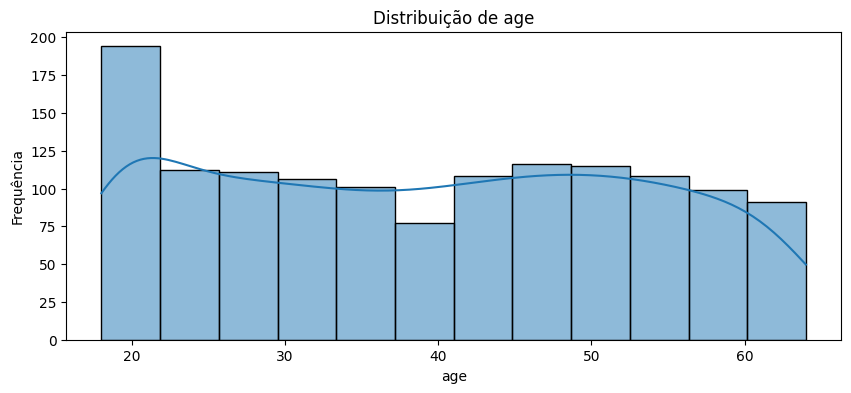

KDEPlot - Gráfico de Densidade
Mostra uma curva suavizada da distribuição dos dados (melhora a percepção em relação ao histograma).


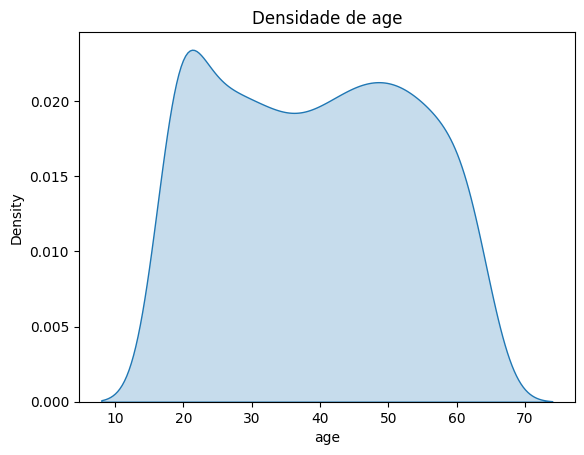

Barplot - Quantidade
Exibe a soma da quantidade por valor


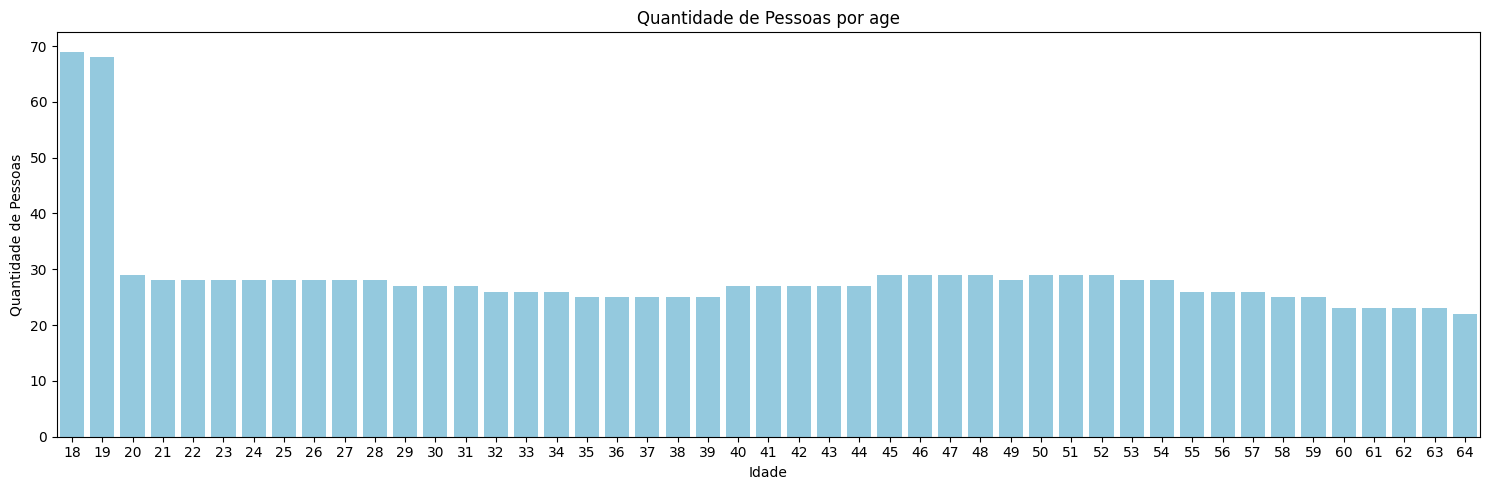

Boxplot - Diagrama de Caixa
Usado para visualizar a distribuição de uma variável numérica, destacando seus valores centrais, dispersão e, principalmente, outliers (valores discrepantes).


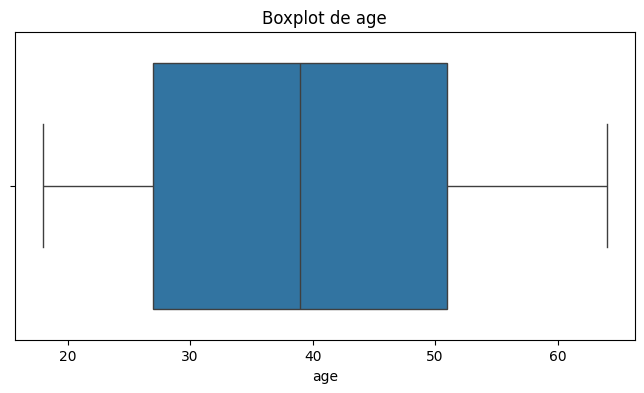

Scatter Plot - Gráfico de Dispersão
Serve para verificar relações entre duas variáveis numéricas (correlação, tendências, agrupamentos).


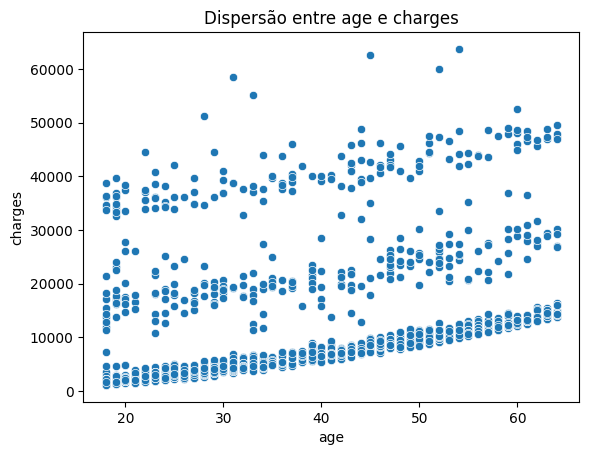

In [108]:
coluna = 'age'
grafico_numerico_histplot(dados_numericos, coluna)
grafico_numerico_kdeplot(dados_numericos, coluna)
grafico_numerico_barplot(dados, coluna)
grafico_numerico_boxplot(dados_numericos, coluna)
grafico_numerico_scatterplot(dados_numericos, coluna, 'charges')

**BMI**

Variável: bmi (Índice de Massa Corporal)
Média: 30,66 — valor acima de 30 já é considerado obesidade pela OMS.

Desvio padrão: 6,10 — mostra uma variação razoável.

Mínimo: 15,96 — abaixo do peso saudável.

Máximo: 53,13 — obesidade severa.

Distribuição:

25% têm BMI até 26,30 — dentro ou próximo do peso saudável.

Mediana em 30,4 — já na faixa de obesidade.

75% até 34,69 — sobrepeso para obesidade grau I.

Observação: Há indícios de outliers no máximo (53,13), que representa obesidade grave e pode impactar modelos estatísticos sensíveis a extremos, no entanto esta informação é real e por isso não será retirada.

In [109]:
dados_numericos['bmi'].describe()

,bmi
count,1338.00
mean,30.66
std,6.10
min,15.96
25%,26.30
50%,30.40
75%,34.69
max,53.13


Histplot - Histograma
Usado para mostrar a distribuição de frequência de uma variável numérica. Ele divide os dados em intervalos (bins) e conta quantos dados caem em cada intervalo.


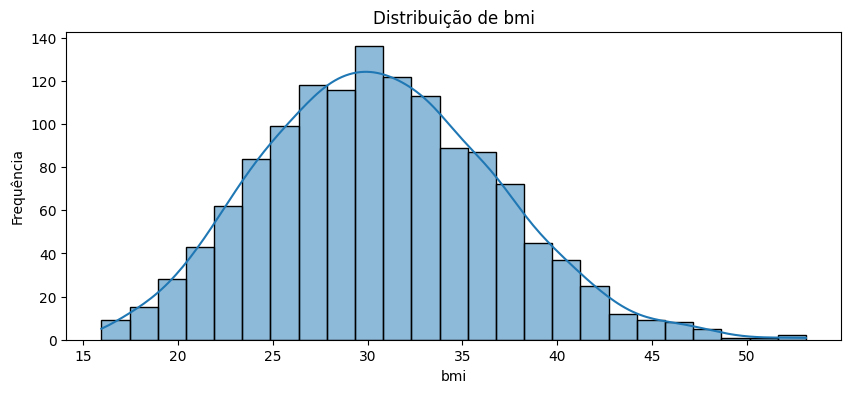

KDEPlot - Gráfico de Densidade
Mostra uma curva suavizada da distribuição dos dados (melhora a percepção em relação ao histograma).


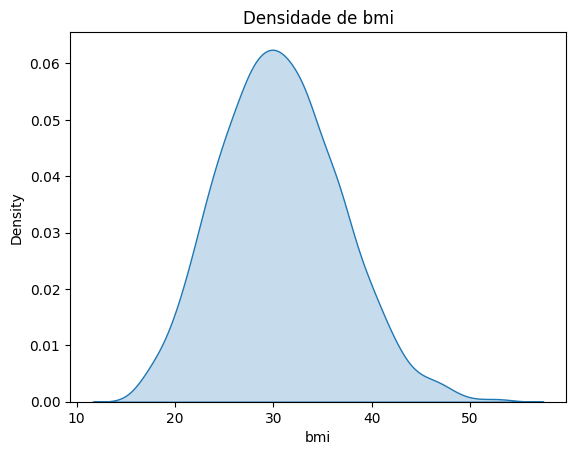

Boxplot - Diagrama de Caixa
Usado para visualizar a distribuição de uma variável numérica, destacando seus valores centrais, dispersão e, principalmente, outliers (valores discrepantes).


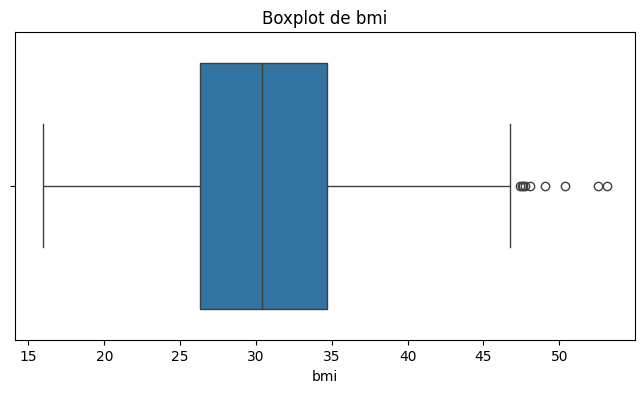

Scatter Plot - Gráfico de Dispersão
Serve para verificar relações entre duas variáveis numéricas (correlação, tendências, agrupamentos).


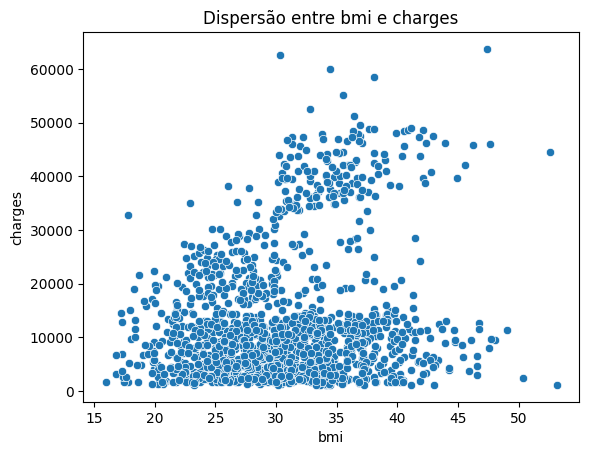

In [110]:
coluna = 'bmi'
grafico_numerico_histplot(dados_numericos, coluna)
grafico_numerico_kdeplot(dados_numericos, coluna)
#exibir_barplot(dados, coluna)
grafico_numerico_boxplot(dados_numericos, coluna)
grafico_numerico_scatterplot(dados_numericos, coluna, 'charges')


# Tabela de IMC:
# IMC (kg/m²)
# Classificação
# Menor que 18,5 # Baixo peso
# 18,5 a 24,9 # Peso normal
# 25 a 29,9 # Sobrepeso
# 30 a 34,9 # Obesidade grau I
# 35 a 39,9 # Obesidade grau II
# 40 ou mais # Obesidade grau III

#não existe nenhum problema aparente

#analisar a possibilidade de transformar em dado categórico

**Children**

Variável: children (número de filhos)
Média: 1,09 filho

Desvio padrão: 1,21

Mínimo: 0 filhos

Máximo: 5 filhos

Distribuição:

50% das pessoas têm até 1 filho.

75% têm até 2 filhos.

Observação: Distribuição fortemente concentrada em famílias pequenas. Sem indícios de outliers (máximo razoável é 5 filhos).

In [111]:
dados_numericos['children'].describe()

,children
count,1338.00
mean,1.09
std,1.21
min,0.00
25%,0.00
50%,1.00
75%,2.00
max,5.00


Histplot - Histograma
Usado para mostrar a distribuição de frequência de uma variável numérica. Ele divide os dados em intervalos (bins) e conta quantos dados caem em cada intervalo.


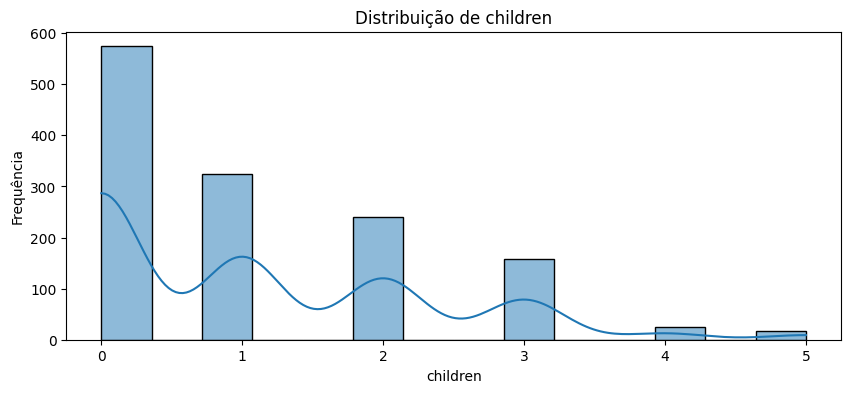

KDEPlot - Gráfico de Densidade
Mostra uma curva suavizada da distribuição dos dados (melhora a percepção em relação ao histograma).


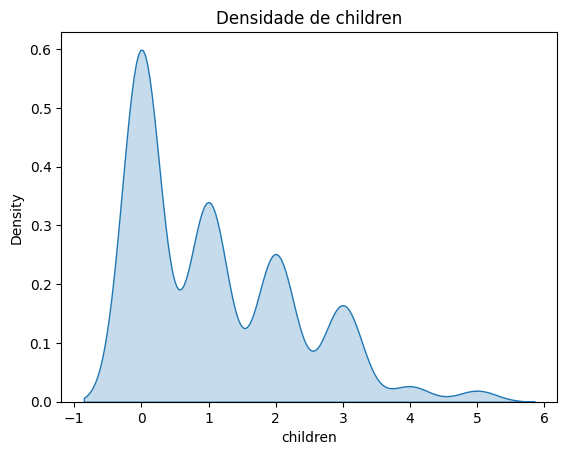

Boxplot - Diagrama de Caixa
Usado para visualizar a distribuição de uma variável numérica, destacando seus valores centrais, dispersão e, principalmente, outliers (valores discrepantes).


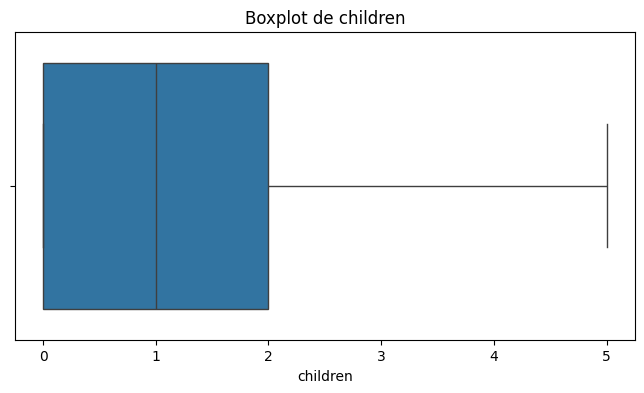

Scatter Plot - Gráfico de Dispersão
Serve para verificar relações entre duas variáveis numéricas (correlação, tendências, agrupamentos).


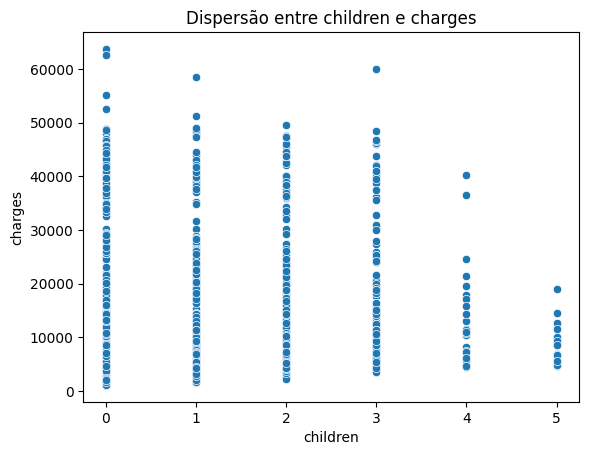

In [112]:
coluna = 'children'
grafico_numerico_histplot(dados_numericos, coluna)
grafico_numerico_kdeplot(dados_numericos, coluna)
#grafico_numerico_barplot(dados, coluna)
grafico_numerico_boxplot(dados_numericos, coluna)
grafico_numerico_scatterplot(dados_numericos, coluna, 'charges')

#não existe nenhum problema aparente

**Charges**

Variável: charges (custos médicos)
Média: 13.270,42

Desvio padrão: 12.110,01 — altíssimo, indicando forte dispersão.

Mínimo: 1.121,87

Máximo: 63.770,43 — valor extremamente alto comparado à média e mediana.

Distribuição:

25% pagaram até 4.740,29

Mediana é 9.382,03

75% pagaram até 16.639,91

Observação: A média é muito superior à mediana, o que indica uma distribuição assimétrica positiva (direita), com alguns indivíduos pagando valores muito altos. Isso é típico em dados de saúde, onde poucos casos de alta complexidade geram custos extremos.

In [113]:
dados_numericos['charges'].describe()

,charges
count,1338.00
mean,13270.42
std,12110.01
min,1121.87
25%,4740.29
50%,9382.03
75%,16639.91
max,63770.43


Histplot - Histograma
Usado para mostrar a distribuição de frequência de uma variável numérica. Ele divide os dados em intervalos (bins) e conta quantos dados caem em cada intervalo.


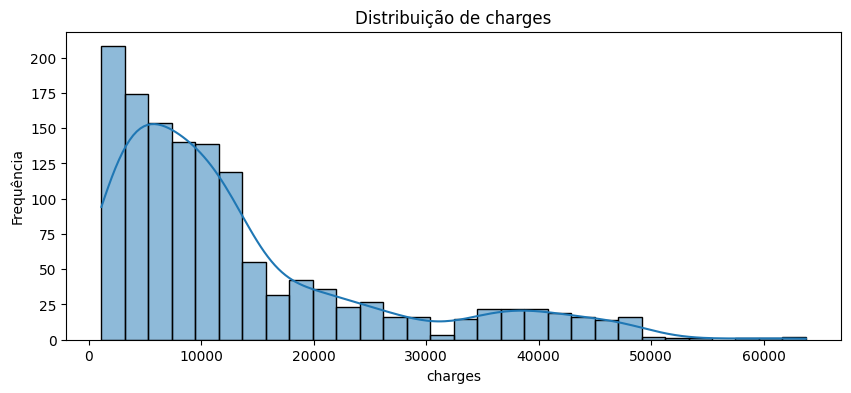

KDEPlot - Gráfico de Densidade
Mostra uma curva suavizada da distribuição dos dados (melhora a percepção em relação ao histograma).


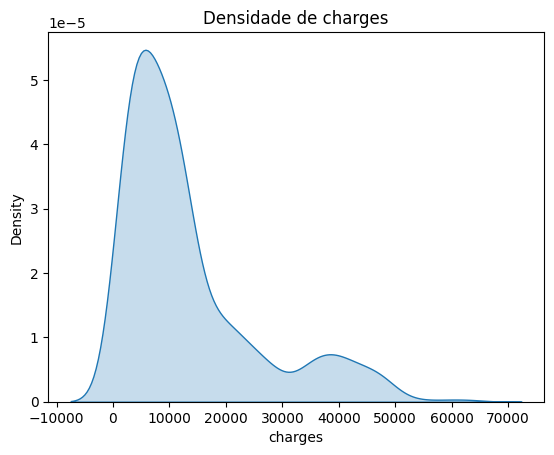

Boxplot - Diagrama de Caixa
Usado para visualizar a distribuição de uma variável numérica, destacando seus valores centrais, dispersão e, principalmente, outliers (valores discrepantes).


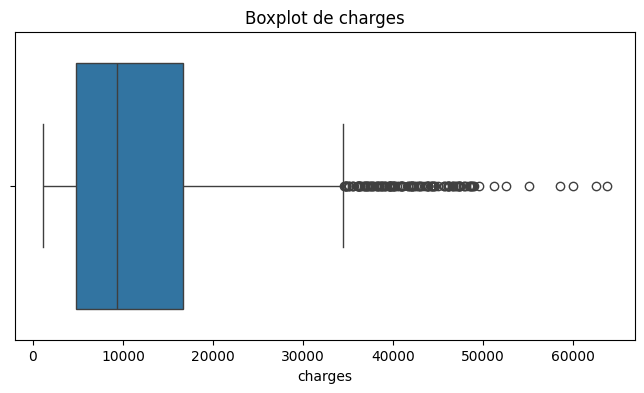

In [114]:
coluna = 'charges'
grafico_numerico_histplot(dados_numericos, coluna)
grafico_numerico_kdeplot(dados_numericos, coluna)
#grafico_numerico_barplot(dados, coluna)
grafico_numerico_boxplot(dados_numericos, coluna)
#grafico_numerico_scatterplot(dados_numericos, coluna, 'charges')

**Combinações e Correlação**

Nenhum problema aparente
a ordem de correlação em relação ao preço é:

1.   Idade
2.   IMC
3.   Nr Filhos

Pairplot - Matriz de gráficos de dispersão
Mostra vários scatterplots entre todas as combinações de variáveis numéricas e as distribuições na diagonal.


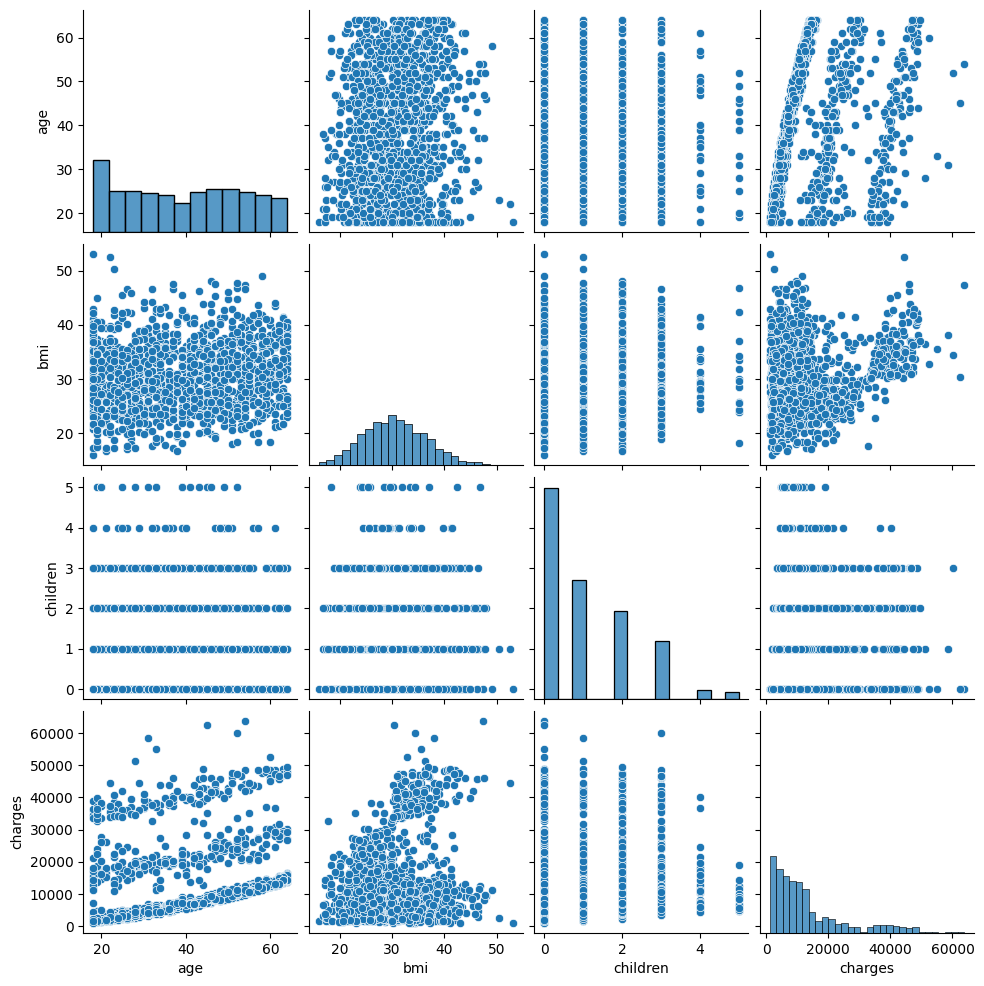

In [115]:
grafico_numerico_pairplot(dados)

Heatmap - Mapa de calor
Exibe quanto o valor de uma variável está ligada ao valor de outra variável.


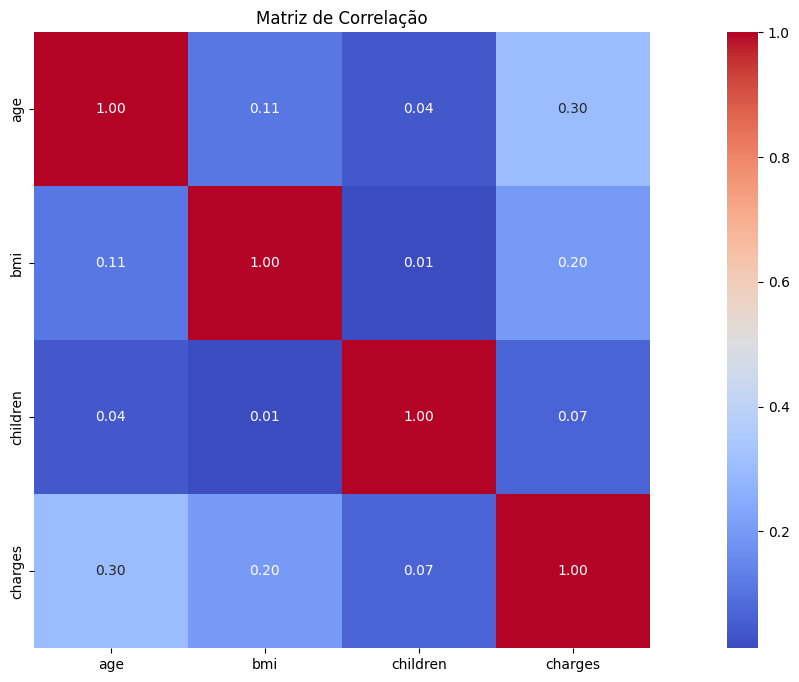

In [116]:
grafico_numerico_heatmap(dados_numericos)

# **Analise dados categóricos**

**Sex**

Variável: sex (Sexo)
Distribuição:

Masculino (male): 676 (≈ 50,52%)

Feminino (female): 662 (≈ 49,48%)

Conclusão: A distribuição entre homens e mulheres é bastante equilibrada, sem viés de gênero relevante na amostra.

In [118]:
print(dados['sex'].value_counts())
print(dados['sex'].value_counts(normalize=True))

sex
male      676
female    662
Name: count, dtype: int64
sex
male     0.51
female   0.49
Name: proportion, dtype: float64


Barplot - Mostra a quantidade ou proporção de cada categoria.
Analisar frequência, média ou outra estatística de uma variável categórica.


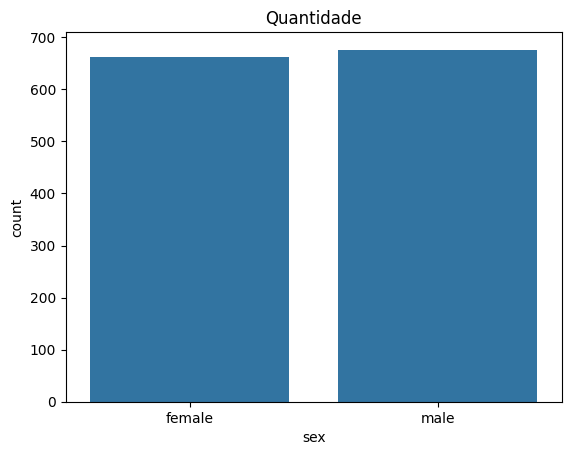

Crosstab - Mostra a contagem cruzada entre duas variáveis categóricas em formato de barras empilhadas.
Analisar a distribuição conjunta de duas variáveis categóricas, identificando como as categorias se relacionam.


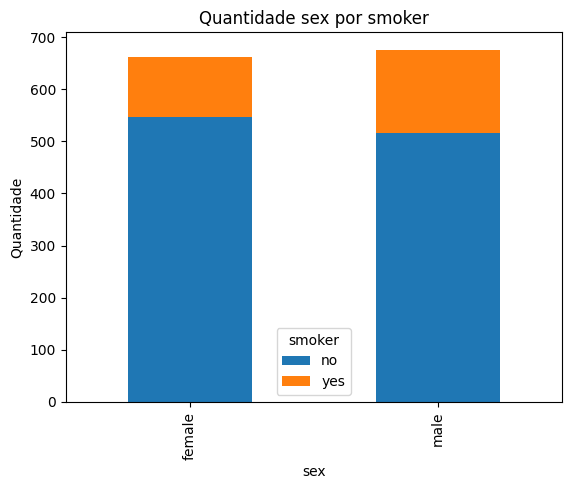

Stripplot - Mostra a dispersão dos valores de uma variável numérica ao longo das categorias, com pontos individuais e jitter para evitar sobreposição.
Visualizar a distribuição, dispersão e densidade dos dados individuais de uma variável numérica por categorias.


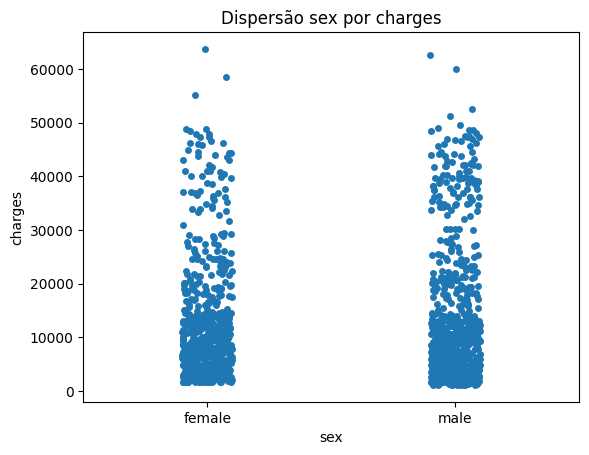

Boxplot - Mostra a distribuição de uma variável numérica por categorias (mediana, quartis e outliers).
Comparar distribuições numéricas entre categorias.


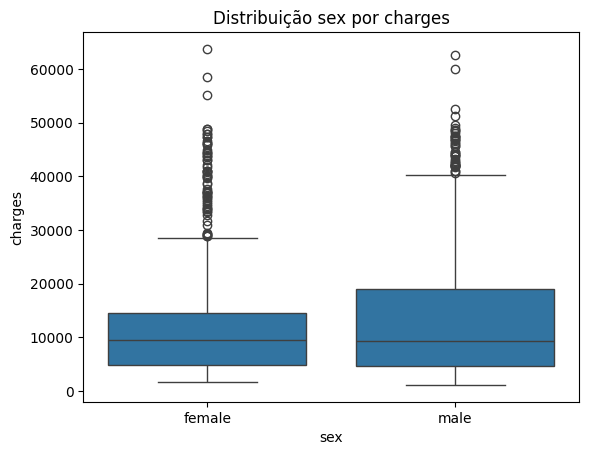

Violin - Combina boxplot e gráfico de densidade. Mostra a distribuição e frequência da variável numérica para cada categoria.
Analisar forma e dispersão da variável numérica por categorias.


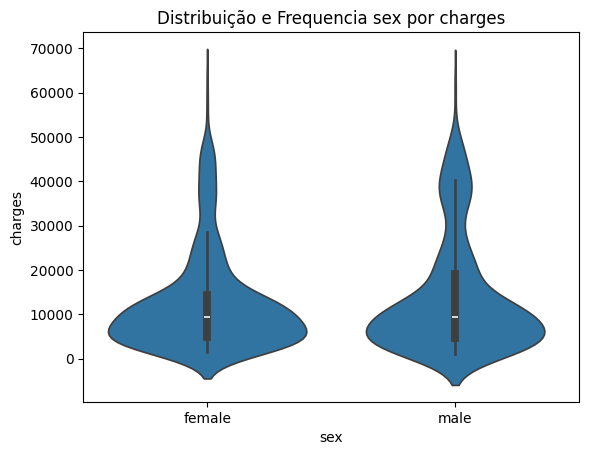

Contadores - Média, Máximo e Mínimo em relação à Target
Comparar Contadores com a Target


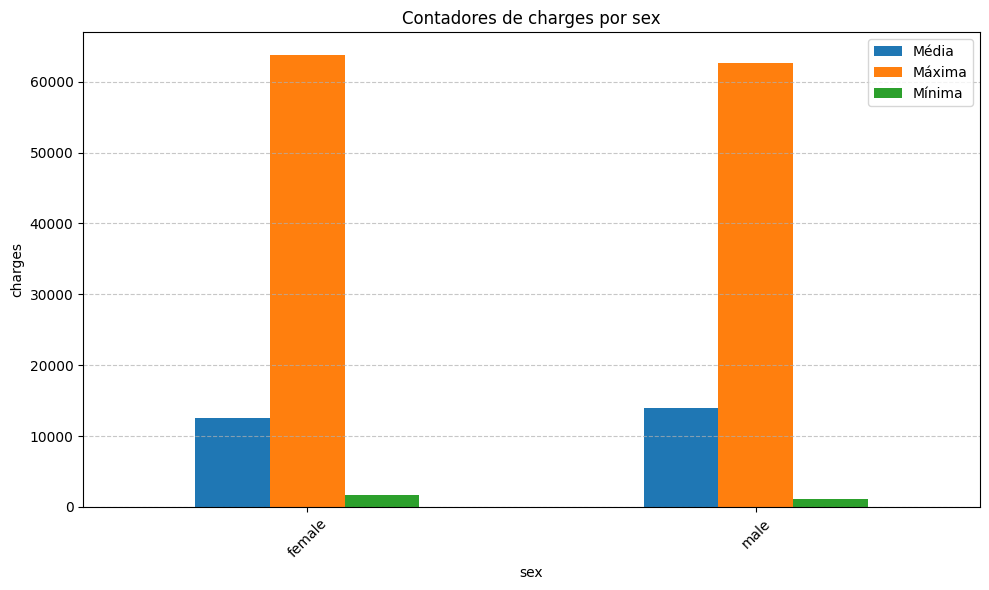

In [119]:
coluna='sex'
target='charges'
grafico_categorico_countplot(dados,coluna)
grafico_categorico_crosstab(dados,coluna,'smoker')
grafico_categorico_stripplot(dados,coluna,'charges')
grafico_categorico_boxplot(dados,coluna,target)
grafico_categorico_violinplot(dados,coluna,target)
grafico_categorico_contadores(dados,coluna,target)

**Smoker**

Variável: smoker (Fumante)
Distribuição:

Não fumantes (no): 1064 (≈ 79,52%)

Fumantes (yes): 274 (≈ 20,48%)

Observação importante:

Cerca de 1 em cada 5 pessoas é fumante, o que pode ter um impacto considerável nos custos médicos (charges).

Fumantes apresentem custos médios muito superiores.

In [120]:
print(dados['smoker'].value_counts())
print(dados['smoker'].value_counts(normalize=True))

smoker
no     1064
yes     274
Name: count, dtype: int64
smoker
no    0.80
yes   0.20
Name: proportion, dtype: float64


Barplot - Mostra a quantidade ou proporção de cada categoria.
Analisar frequência, média ou outra estatística de uma variável categórica.


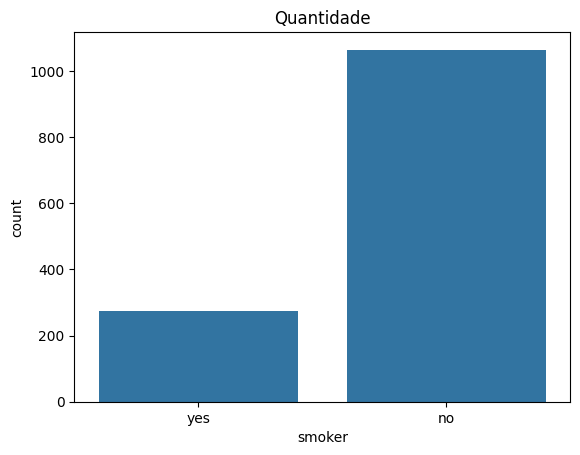

Crosstab - Mostra a contagem cruzada entre duas variáveis categóricas em formato de barras empilhadas.
Analisar a distribuição conjunta de duas variáveis categóricas, identificando como as categorias se relacionam.


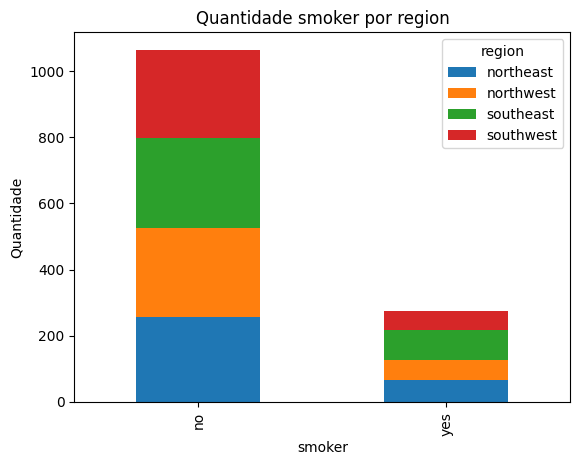

Stripplot - Mostra a dispersão dos valores de uma variável numérica ao longo das categorias, com pontos individuais e jitter para evitar sobreposição.
Visualizar a distribuição, dispersão e densidade dos dados individuais de uma variável numérica por categorias.


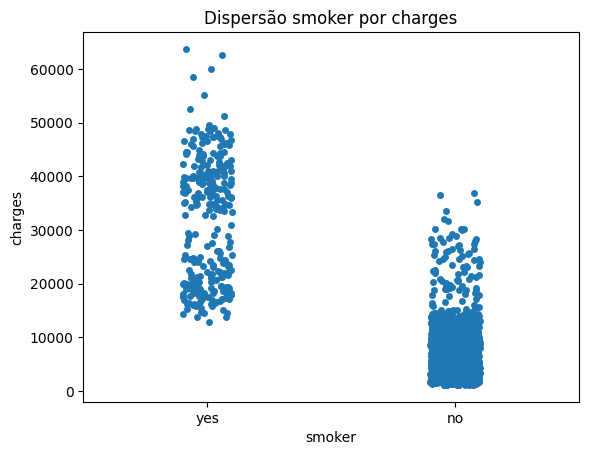

Boxplot - Mostra a distribuição de uma variável numérica por categorias (mediana, quartis e outliers).
Comparar distribuições numéricas entre categorias.


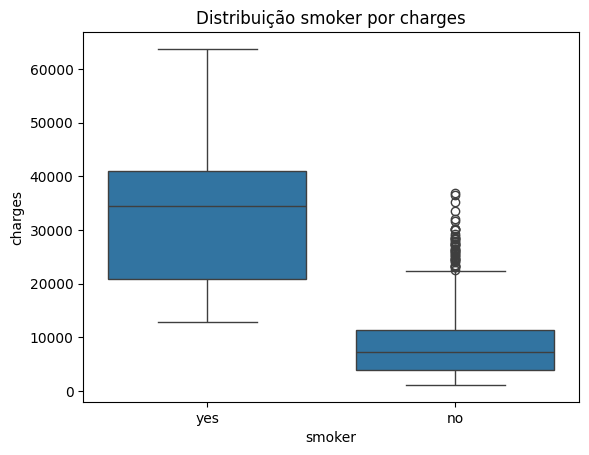

Violin - Combina boxplot e gráfico de densidade. Mostra a distribuição e frequência da variável numérica para cada categoria.
Analisar forma e dispersão da variável numérica por categorias.


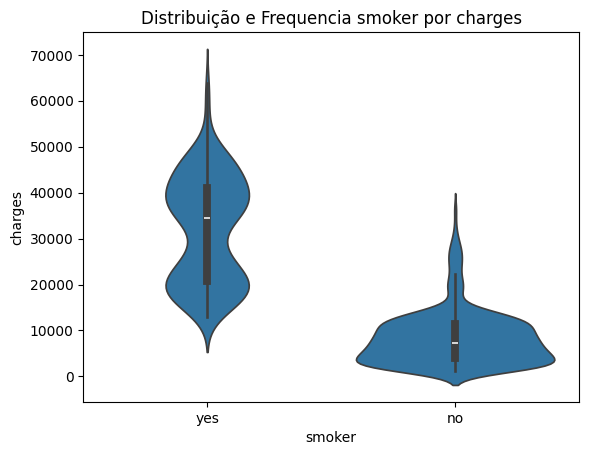

Contadores - Média, Máximo e Mínimo em relação à Target
Comparar Contadores com a Target


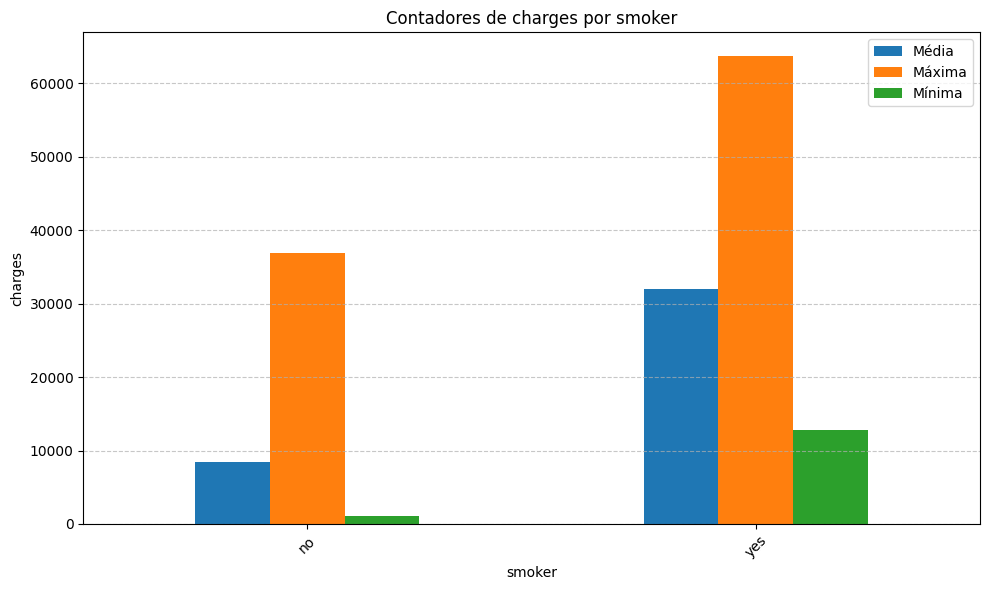

In [121]:
coluna='smoker'
target='charges'
grafico_categorico_countplot(dados,coluna)
grafico_categorico_crosstab(dados,coluna,'region')
grafico_categorico_stripplot(dados,coluna,'charges')
grafico_categorico_boxplot(dados,coluna,target)
grafico_categorico_violinplot(dados,coluna,target)
grafico_categorico_contadores(dados,coluna,target)

**Region**

Variável: region (Região)
Distribuição:

Southeast: 364 (≈ 27,20%)

Southwest: 325 (≈ 24,29%)

Northwest: 325 (≈ 24,29%)

Northeast: 324 (≈ 24,22%)

Conclusão: A amostra está bem distribuída entre as quatro regiões, com leve predominância da região Southeast (≈ 27%). As demais regiões estão quase igualmente representadas.

In [122]:
print(dados['region'].value_counts())
print(dados['region'].value_counts(normalize=True))

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
region
southeast   0.27
southwest   0.24
northwest   0.24
northeast   0.24
Name: proportion, dtype: float64


Barplot - Mostra a quantidade ou proporção de cada categoria.
Analisar frequência, média ou outra estatística de uma variável categórica.


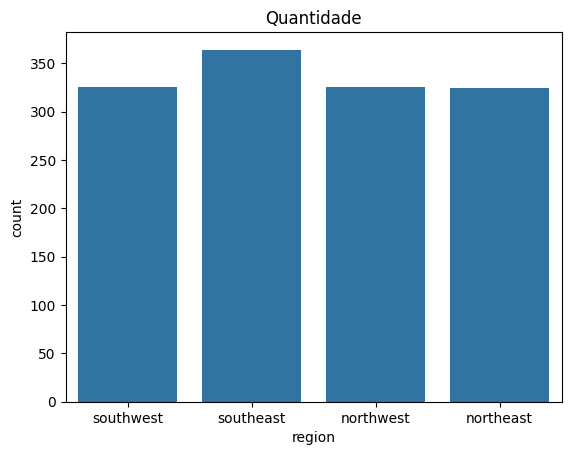

Crosstab - Mostra a contagem cruzada entre duas variáveis categóricas em formato de barras empilhadas.
Analisar a distribuição conjunta de duas variáveis categóricas, identificando como as categorias se relacionam.


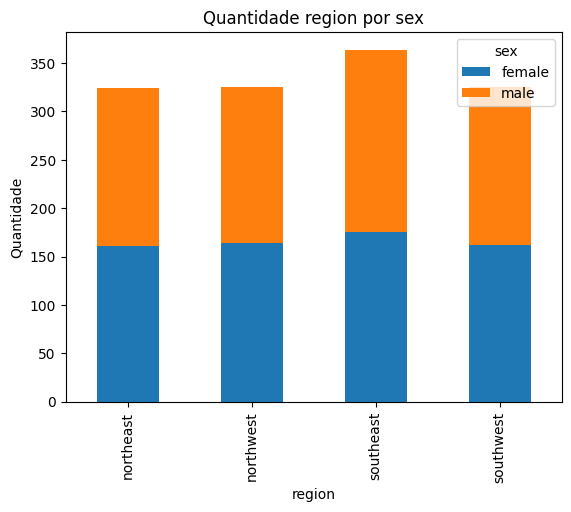

Stripplot - Mostra a dispersão dos valores de uma variável numérica ao longo das categorias, com pontos individuais e jitter para evitar sobreposição.
Visualizar a distribuição, dispersão e densidade dos dados individuais de uma variável numérica por categorias.


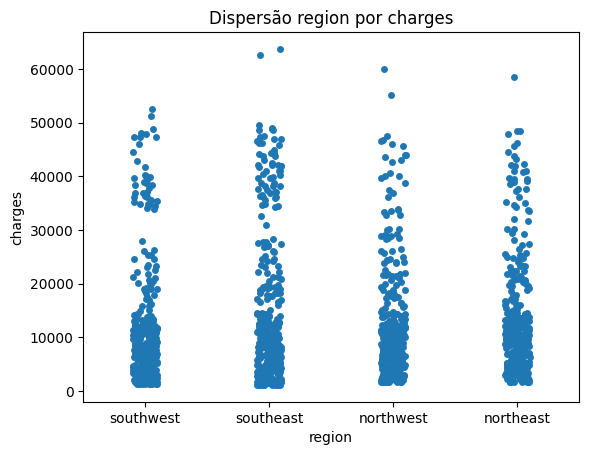

Boxplot - Mostra a distribuição de uma variável numérica por categorias (mediana, quartis e outliers).
Comparar distribuições numéricas entre categorias.


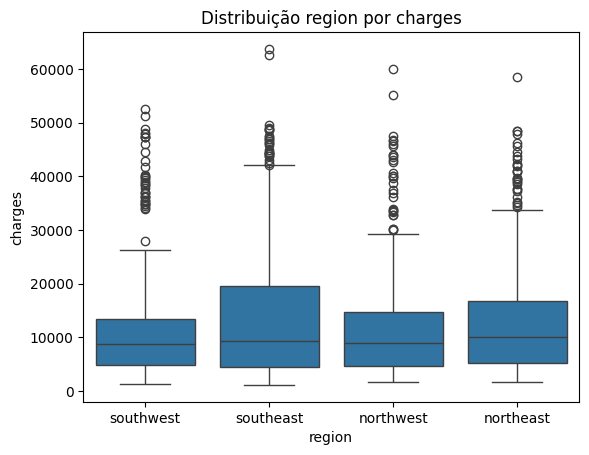

Violin - Combina boxplot e gráfico de densidade. Mostra a distribuição e frequência da variável numérica para cada categoria.
Analisar forma e dispersão da variável numérica por categorias.


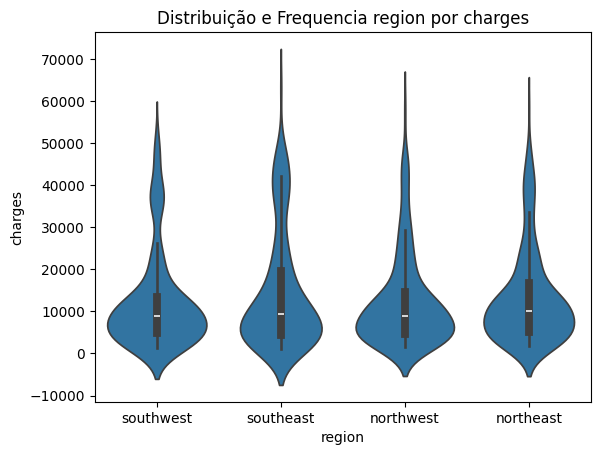

Contadores - Média, Máximo e Mínimo em relação à Target
Comparar Contadores com a Target


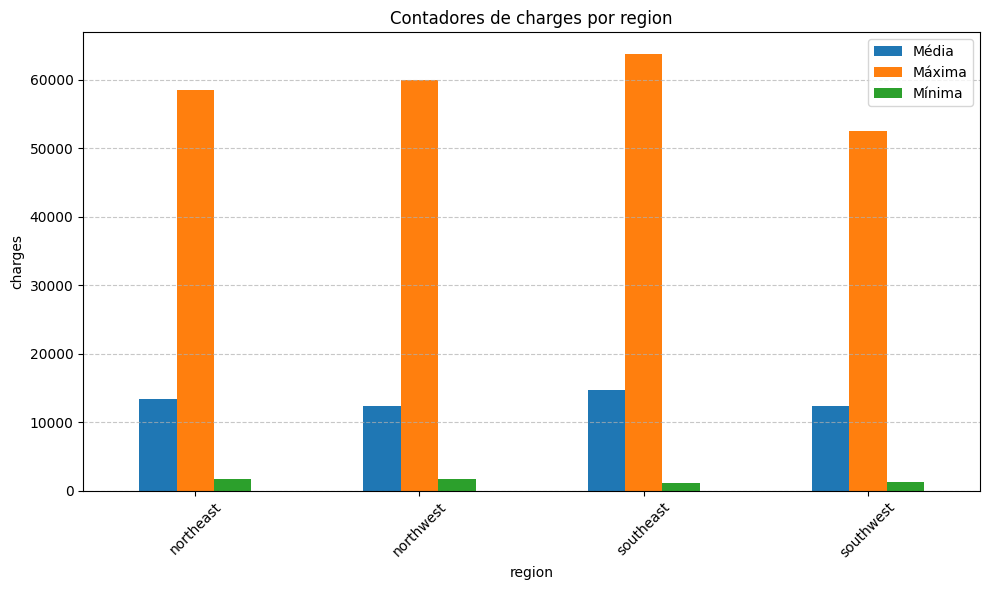

In [123]:
coluna='region'
target='charges'
grafico_categorico_countplot(dados,coluna)
grafico_categorico_crosstab(dados,coluna,'sex')
grafico_categorico_stripplot(dados,coluna,'charges')
grafico_categorico_boxplot(dados,coluna,target)
grafico_categorico_violinplot(dados,coluna,target)
grafico_categorico_contadores(dados,coluna,target)

# **Tratamento para dados categóricos**

Foi observado que as colunas Sex e Smoker são binárias, neste caso eu preferi categorizar manualmente

Já a coluna region possui pouca variação da variável em relação à target, desta forma, não vejo a necessidade de utilizar a categorização por One-Hot Encoding, que aumenta o numero de colunas à serem processadas, acho melhor utilizar a importancia da variável em relação ao Label Encoder

In [124]:
#verificando a quantidade de categorias por variável
for coluna in dados_categoricos.columns:
    n_unicos = dados_categoricos[coluna].nunique()
    print(f"{coluna}: {n_unicos} categorias")

sex: 2 categorias
smoker: 2 categorias
region: 4 categorias


In [125]:
print(dados.groupby('sex').size().reset_index(name='count'))
print('-' * 50)
print(dados.groupby('smoker').size().reset_index(name='count'))
print('-' * 50)
print(dados.groupby('region').size().reset_index(name='count'))

      sex  count
0  female    662
1    male    676
--------------------------------------------------
  smoker  count
0     no   1064
1    yes    274
--------------------------------------------------
      region  count
0  northeast    324
1  northwest    325
2  southeast    364
3  southwest    325


In [126]:
#As variáves sex e smoker são binárias, neste caso eu preferi categorizar manualmente
dic_fumante = {'yes': 1, 'no': 0}
dic_sexo = {'male': 1, 'female': 0}

In [127]:

if dados_categoricos['smoker'].dtype == 'object': #para não estragar se executar mais de uma vez
  dados_categoricos['smoker'] = dados_categoricos['smoker'].map(dic_fumante)
if dados_categoricos['sex'].dtype == 'object': #para não estragar se executar mais de uma vez
  dados_categoricos['sex'] = dados_categoricos['sex'].map(dic_sexo)



In [128]:
dados_categoricos.head()

,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


In [129]:
#verificando a importância para categorizar a região:

# Média de charges por região, ordenada decrescente
media_charges_region = dados.groupby('region')['charges'].mean().sort_values(ascending=False)

# Criar dicionário de mapeamento invertido: maior média recebe maior número
mapeamento_importancia = {regiao: idx for idx, regiao in enumerate(media_charges_region.index[::-1])}

# Mostrar mapeamento
print(mapeamento_importancia)

{'southwest': 0, 'northwest': 1, 'northeast': 2, 'southeast': 3}


In [130]:
dic_regiao = {'southwest': 0, 'northwest': 1, 'northeast': 2, 'southeast': 3}

In [131]:
#categorizando a região
#foi observada pouca variação da variável em relação à target

#não vejo a necessidade de utilizar a categorização por One-Hot Encoding, que aumenta o numero de colunas à serem processadas
#e acho melhor utilizar a importancia da variável em relação ao Label Encoder


if dados_categoricos['region'].dtype == 'object':#para não estragar se executar mais de uma vez
  dados_categoricos['region'] = dados_categoricos['region'].map(dic_regiao)

dados_categoricos.head()

,sex,smoker,region
0,0,1,0
1,1,0,3
2,1,0,3
3,1,0,1
4,1,0,1


# **Analise após tratamento das variàveis categóricas**

Foi observado qua a correlação entre as variáveis e o target fazem todo sentido:

smoker     0.79

age        0.30

bmi        0.20

region     0.08

children   0.07

sex        0.06

In [132]:
dados_categoricos.head()

,sex,smoker,region
0,0,1,0
1,1,0,3
2,1,0,3
3,1,0,1
4,1,0,1


In [133]:
dados_numericos.head()

,age,bmi,children,charges
0,19,27.90,0,16884.92
1,18,33.77,1,1725.55
2,28,33.00,3,4449.46
3,33,22.70,0,21984.47
4,32,28.88,0,3866.86


In [134]:
dados_Analise_final = pd.concat([dados_categoricos, dados_numericos], axis=1)
dados_Analise_final.head(10)

,sex,smoker,region,age,bmi,children,charges
0,0,1,0,19,27.90,0,16884.92
1,1,0,3,18,33.77,1,1725.55
2,1,0,3,28,33.00,3,4449.46
3,1,0,1,33,22.70,0,21984.47
4,1,0,1,32,28.88,0,3866.86
5,0,0,3,31,25.74,0,3756.62
6,0,0,3,46,33.44,1,8240.59
7,0,0,1,37,27.74,3,7281.51
8,1,0,2,37,29.83,2,6406.41
9,0,0,1,60,25.84,0,28923.14


Pairplot - Matriz de gráficos de dispersão
Mostra vários scatterplots entre todas as combinações de variáveis numéricas e as distribuições na diagonal.


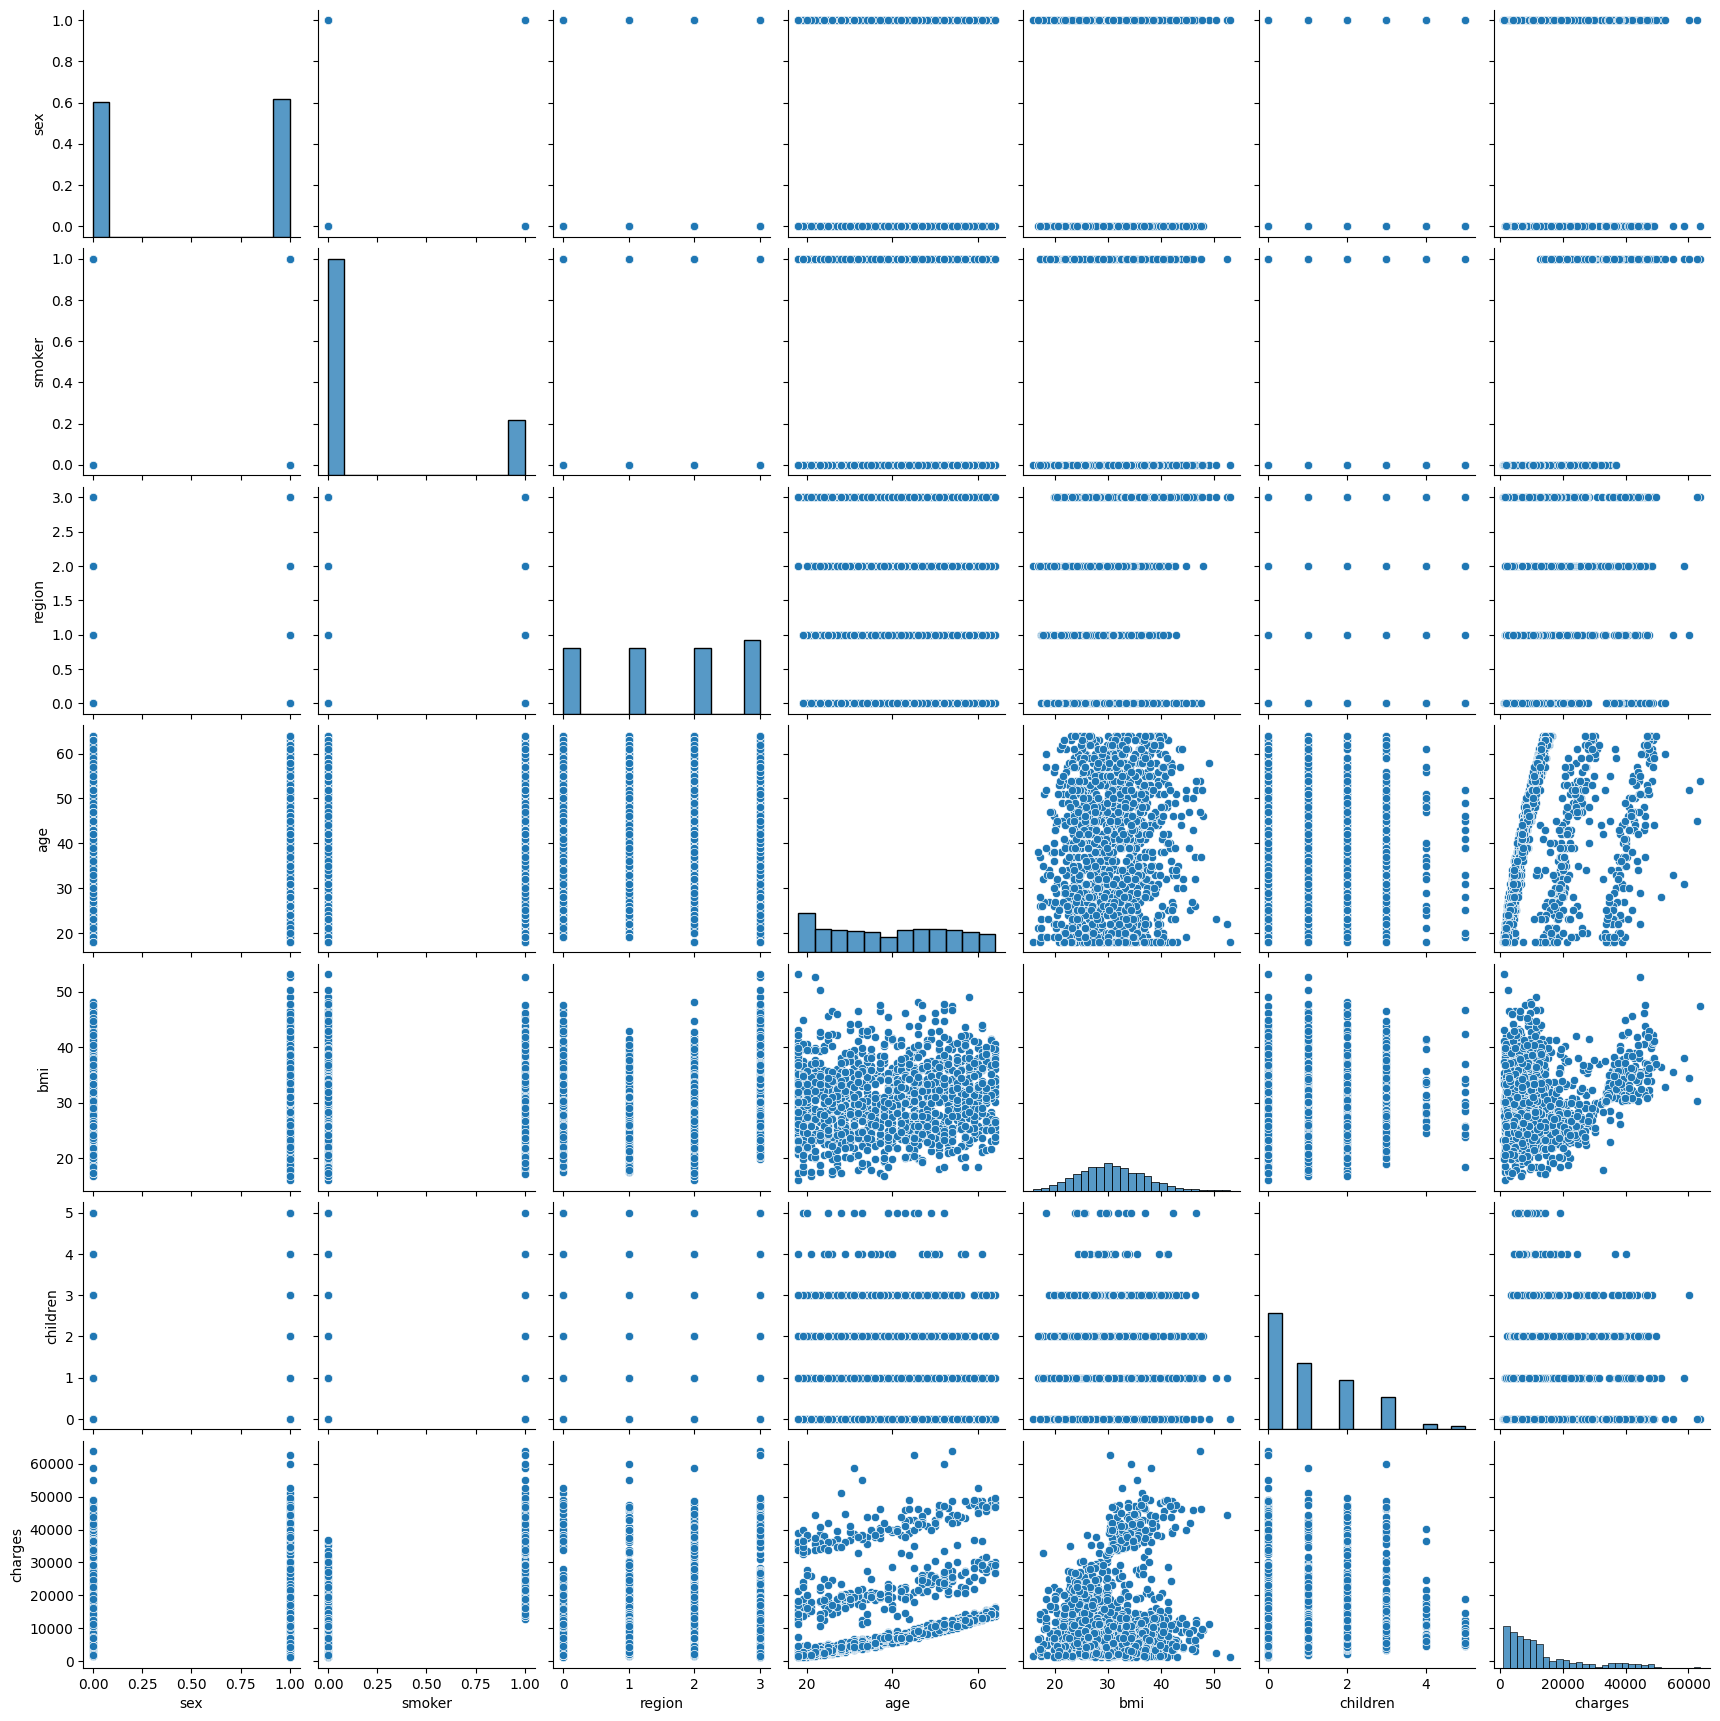

In [135]:
grafico_numerico_pairplot(dados_Analise_final)

Heatmap - Mapa de calor
Exibe quanto o valor de uma variável está ligada ao valor de outra variável.


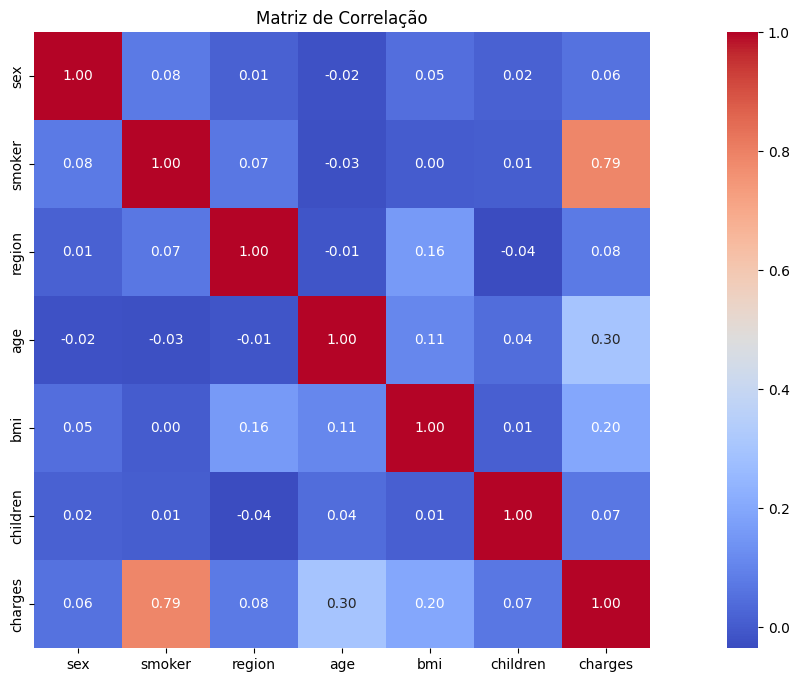

In [136]:
grafico_numerico_heatmap(dados_Analise_final)

<ipython-input-137-6c7e1c28bda6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes_target.values, y=correlacoes_target.index, palette='coolwarm')


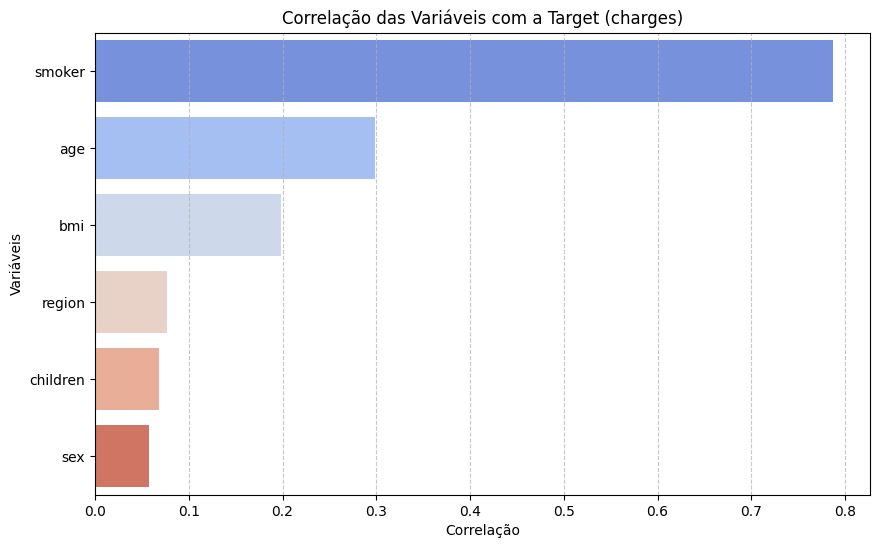

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcula as correlações com a variável target 'charger'
correlacoes_target = dados_Analise_final.corr()['charges'].drop('charges')  # Remove a correlação da variável com ela mesma

# Ordena do maior para o menor
correlacoes_target = correlacoes_target.sort_values(ascending=False)

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacoes_target.values, y=correlacoes_target.index, palette='coolwarm')

plt.title('Correlação das Variáveis com a Target (charges)')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [139]:
print(correlacoes_target)

smoker     0.79
age        0.30
bmi        0.20
region     0.08
children   0.07
sex        0.06
Name: charges, dtype: float64


# **Separando os dados da target (X e y)**

In [38]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
X = dados.drop(columns=['charges'])  # todas as colunas, menos a target
y = dados['charges']                 # só a coluna target

In [40]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


# **Separando em treino e teste**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Definindo o escalonando das variáveis numéricas, exceto a target**

Se a variável é assimétrica, técnicas como MinMaxScaler são mais indicadas.

Presença de outliers — se há muitos outliers, usa-se RobustScaler, que é robusto a eles.

Distribuições aproximadamente normais — usam-se StandardScaler (padronização Z-score).

**Resultado:**

age: StandardScaler
bmi: RobustScaler
children: StandardScaler

In [43]:
def analisar_e_recomendar_escalonamento(X_train):
    print("Análise de escalonamento sugerido para cada feature:\n")
    recomendacoes = {}

    for col in X_train.columns:
        data = X_train[col]
        skew = data.skew()
        outliers = np.sum((data < data.quantile(0.01)) | (data > data.quantile(0.99)))

        if outliers > 0.02 * len(data):  # mais de 2% de outliers
            metodo = "RobustScaler"
        elif abs(skew) > 1:  # distribuição muito assimétrica
            metodo = "MinMaxScaler"
        else:
            metodo = "StandardScaler"

        recomendacoes[col] = metodo

        print(f"{col}:")
        print(f"  - Skew: {skew:.2f}")
        print(f"  - Outliers (±1% quantis): {outliers}")
        print(f"  - Recomendação: {metodo}")
        print("-" * 40)

        # plot
        sns.histplot(data, kde=True)
        plt.title(f"Distribuição de {col}")
        plt.show()

    return recomendacoes


def analisar_e_recomendar_escalonamento_simplificado(X_train):
    for col in X_train.columns:
        data = X_train[col]
        skew = data.skew()
        outliers = np.sum((data < data.quantile(0.01)) | (data > data.quantile(0.99)))
        if outliers > 0.02 * len(data):  # mais de 2% de outliers
            metodo = "RobustScaler"
        elif abs(skew) > 1:  # distribuição muito assimétrica
            metodo = "MinMaxScaler"
        else:
            metodo = "StandardScaler"
        print(f"\"{col}\":\"{metodo}\"")
    return

def analisar_e_recomendar_escalonamento_target_simplificado(y_train):
  skew = y_train.skew()
  outliers = np.sum((y_train < y_train.quantile(0.01)) | (y_train > y_train.quantile(0.99)))
  if outliers > 0.02 * len(y_train):  # mais de 2% de outliers
      metodo = "RobustScaler"
  elif abs(skew) > 1:  # distribuição muito assimétrica
      metodo = "MinMaxScaler"
  else:
      metodo = "StandardScaler"
  print(f"\"charges\":\"{metodo}\"")
  return

In [46]:
analisar_e_recomendar_escalonamento_simplificado(X_train.drop(columns=['sex','smoker','region']))

"age":"StandardScaler"
"bmi":"RobustScaler"
"children":"StandardScaler"


Análise de escalonamento sugerido para cada feature:

age:
  - Skew: 0.05
  - Outliers (±1% quantis): 0
  - Recomendação: StandardScaler
----------------------------------------


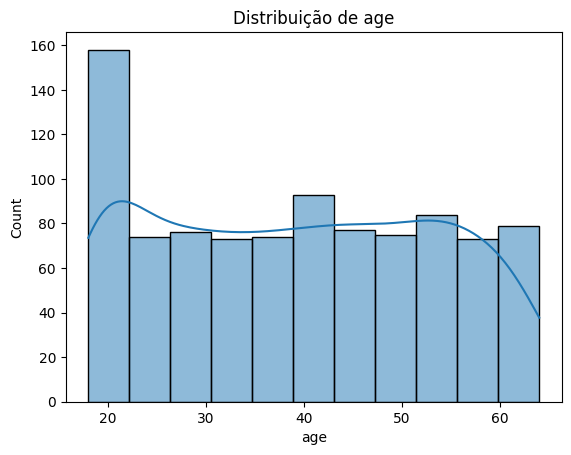

bmi:
  - Skew: 0.28
  - Outliers (±1% quantis): 20
  - Recomendação: RobustScaler
----------------------------------------


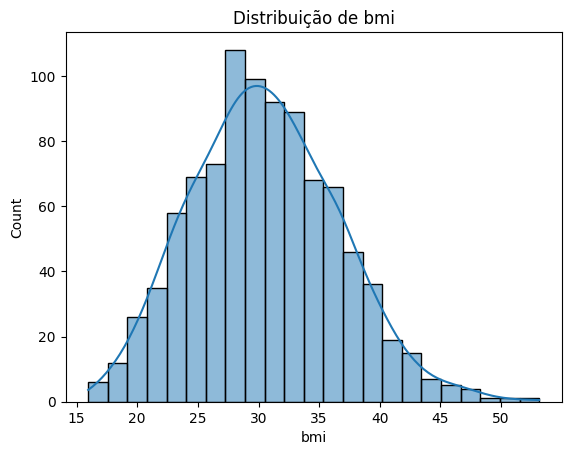

children:
  - Skew: 0.91
  - Outliers (±1% quantis): 0
  - Recomendação: StandardScaler
----------------------------------------


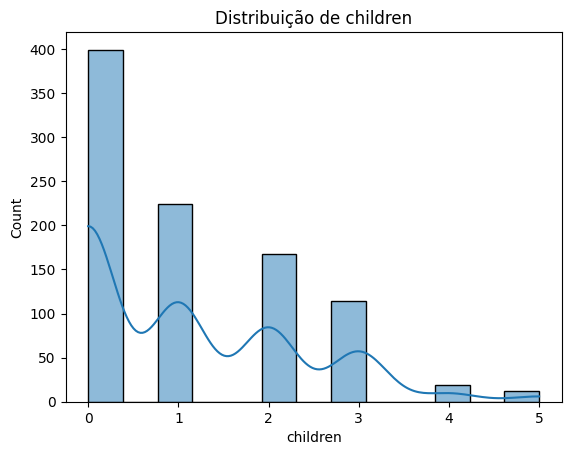

In [44]:
recomendacoes = analisar_e_recomendar_escalonamento(X_train.drop(columns=['sex','smoker','region']))

# **Definindo o escalonando das variáveis categóricas e realizando o escalonamento de todas as variáveis com o ColumnTransformer**

As variáves sex e smoker são binárias, neste caso eu preferi categorizar manualmente

A variável region é muito bem balanceada em relação à target e de pouca relavância para o modelo, por isso optei por não realizar one hot encoding, e sim colocar em escala entre 0 e 1 de acordo com a média em relaçõa com a target, conforme analise realizada no bloco "Tratamento para dados categóricos"

In [55]:
#As variáves sex e smoker são binárias, neste caso eu preferi categorizar manualmente
dic_sexo = {'male': 1, 'female': 0}
dic_fumante = {'yes': 1, 'no': 0}
dic_regiao = {'southwest': 0, 'northwest': 1, 'northeast': 2, 'southeast': 3}

In [56]:
def encode_sexo(X):
  X = pd.DataFrame(X, columns=['sex'])
  # Transforma os valores
  X_encoded = X.replace(dic_sexo)
  return X_encoded

def encode_fumante(X):
  X = pd.DataFrame(X, columns=['smoker'])
  # Transforma os valores
  X_encoded = X.replace(dic_fumante)
  return X_encoded

def encode_regiao(X):
  X = pd.DataFrame(X, columns=['region'])
  # Transforma os valores
  X_encoded = X.replace(dic_regiao)
  return X_encoded/3

custom_transformer_sexo = FunctionTransformer(encode_sexo, validate=False)
custom_transformer_fumante = FunctionTransformer(encode_fumante, validate=False)
custom_transformer_regiao = FunctionTransformer(encode_regiao, validate=False)

In [57]:
transform_StandardScaler_columns = ['age',  'children']
transform_RobustScaler_columns = ['bmi']
transform_sexo = ['sex']
transform_fumante = ['smoker']
transform_region = ['region']

transform_RobustScaler_taeget_column = ['charges']

In [58]:
# Criar o ColumnTransformer com os escalonadores apropriados
preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), transform_StandardScaler_columns),
        ('robust', RobustScaler(), transform_RobustScaler_columns),
        ('transformer_sexo', custom_transformer_sexo, transform_sexo),
        ('transformer_fumante', custom_transformer_fumante, transform_fumante),
        ('transformer_regiao', custom_transformer_regiao, transform_region)
    ]
)

In [59]:
# Antes
X_train.head()

,age,sex,bmi,children,smoker,region
332,61,female,31.160,0,no,northwest
355,46,male,27.600,0,no,southwest
138,54,female,31.900,3,no,southeast
381,55,male,30.685,0,yes,northeast
292,25,male,45.540,2,yes,southeast


In [60]:
# Transforma os dados de treino
X_train_transformed = preprocessor.fit_transform(X_train)
# Transforma os dados de teste com o mesmo preprocessor
X_test_transformed = preprocessor.transform(X_test)

print(f"Exemplo de Treino transformado: {X_train_transformed[0:5]}")
print()
print(f"Exemplo de Teste transformado: {X_test_transformed[0:5]}")
print()
print()

Exemplo de Treino transformado: [[ 1.54446486 -0.91501097  0.11551908  0.          0.          0.33333333]
 [ 0.48187425 -0.91501097 -0.31737346  1.          0.          0.        ]
 [ 1.04858924  1.56027883  0.20550236  0.          0.          1.        ]
 [ 1.11942861 -0.91501097  0.05775954  1.          1.          0.66666667]
 [-1.00575261  0.73518223  1.86411309  1.          1.          1.        ]]

Exemplo de Teste transformado: [[ 0.41103487  0.73518223 -0.6122511   0.          0.          0.66666667]
 [-0.22651949 -0.91501097 -0.02310382  0.          0.          0.33333333]
 [ 1.75698298 -0.91501097 -0.40431677  0.          1.          0.33333333]
 [ 0.48187425  1.56027883 -0.54293966  1.          0.          0.33333333]
 [-1.43078885 -0.91501097  0.20793434  1.          1.          0.33333333]]




<ipython-input-56-01ddae7177d7>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_sexo)
<ipython-input-56-01ddae7177d7>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_fumante)
<ipython-input-56-01ddae7177d7>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

# **Hiper parâmetros e validação cruzada**

Foi utilizado o GridSearchCV para realizar a validação cruzada por diversas veses, até encontrar os melhores parâmetroa para cada modelo e definir quais modelos obtiveram melho resultado para estes dados.

A validação cruzada foi realizada diversas veses, com matrizes de parâmetros diferentes até chegar nos melhores parâmetros.

Os algoritmos que tiveram melhor resultado foram: RandomForest e GradientBoosting

In [72]:
# Dicionário com os modelos e seus hiperparâmetros

modelos_parametros = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # sem hiperparâmetros para testar
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [2,3,4, None],
            'min_samples_split': [2,3,4]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [150,160,175,177,178,179,180],
            'max_depth': [None, 3,4,5],
            'min_samples_split': [10,11,12,13,14]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [78,79,80],
            'learning_rate': [0.09,0.1,1.11],
            'max_depth': [2,3]
        }
    },
    'KNeighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3,4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}


In [73]:
modelos_parametros

{'LinearRegression': {'model': LinearRegression(), 'params': {}},
 'DecisionTree': {'model': DecisionTreeRegressor(),
  'params': {'max_depth': [2, 3, 4, None], 'min_samples_split': [2, 3, 4]}},
 'RandomForest': {'model': RandomForestRegressor(),
  'params': {'n_estimators': [150, 160, 175, 177, 178, 179, 180],
   'max_depth': [None, 3, 4, 5],
   'min_samples_split': [10, 11, 12, 13, 14]}},
 'GradientBoosting': {'model': GradientBoostingRegressor(),
  'params': {'n_estimators': [78, 79, 80],
   'learning_rate': [0.09, 0.1, 1.11],
   'max_depth': [2, 3]}},
 'KNeighbors': {'model': KNeighborsRegressor(),
  'params': {'n_neighbors': [3, 4, 5], 'weights': ['uniform', 'distance']}}}

In [74]:
y_test.head()

,charges
764,9095.07
887,5272.18
890,29330.98
1293,9301.89
259,33750.29


In [75]:
resultados = []
for nome, mp in modelos_parametros.items():
    print(f"Treinando {nome}...")
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train_transformed, y_train)
    y_pred = grid.predict(X_test_transformed)
    mse = mean_squared_error( y_test,y_pred)
    print(f"Melhor MSE: {mse}")
    resultados.append({
        'modelo': nome,
        'melhores_params': grid.best_params_,
        'MSE_test': mse
    })
df_resultados = pd.DataFrame(resultados)

Treinando LinearRegression...
Melhor MSE: 34011999.59546061
Treinando DecisionTree...
Melhor MSE: 22877590.790484734
Treinando RandomForest...
Melhor MSE: 19574659.39686051
Treinando GradientBoosting...
Melhor MSE: 18956450.24532477
Treinando KNeighbors...
Melhor MSE: 30644000.251035597


In [76]:
df_resultados.modelo


,modelo
0,LinearRegression
1,DecisionTree
2,RandomForest
3,GradientBoosting
4,KNeighbors


In [77]:
pd.set_option('display.float_format', '{:.2f}'.format)
print(df_resultados.MSE_test)



0   34011999.60
1   22877590.79
2   19574659.40
3   18956450.25
4   30644000.25
Name: MSE_test, dtype: float64


In [78]:
print(df_resultados)

             modelo                                    melhores_params  \
0  LinearRegression                                                 {}   
1      DecisionTree           {'max_depth': 3, 'min_samples_split': 3}   
2      RandomForest  {'max_depth': 4, 'min_samples_split': 10, 'n_e...   
3  GradientBoosting  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...   
4        KNeighbors          {'n_neighbors': 5, 'weights': 'distance'}   

     MSE_test  
0 34011999.60  
1 22877590.79  
2 19574659.40  
3 18956450.25  
4 30644000.25  


In [79]:
df_resultados.melhores_params[2]

{'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 179}

In [80]:
df_resultados.melhores_params[3]

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 79}

In [81]:
print(df_resultados)
print()
print(f"Melhores parâmetros da RandomForest: {df_resultados.melhores_params[2]}")
print()
print(f"Melhores parâmetros da GradientBoosting: {df_resultados.melhores_params[3]}")

             modelo                                    melhores_params  \
0  LinearRegression                                                 {}   
1      DecisionTree           {'max_depth': 3, 'min_samples_split': 3}   
2      RandomForest  {'max_depth': 4, 'min_samples_split': 10, 'n_e...   
3  GradientBoosting  {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...   
4        KNeighbors          {'n_neighbors': 5, 'weights': 'distance'}   

     MSE_test  
0 34011999.60  
1 22877590.79  
2 19574659.40  
3 18956450.25  
4 30644000.25  

Melhores parâmetros da RandomForest: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 179}

Melhores parâmetros da GradientBoosting: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 79}


# **Treinamento do Modelo**

Comparando os modelos Random Forest e Gradient Boosting, o modelo Gradient Boosting apresentou o melhor desempenho, (MSE de 18956450 e R² de 0.8707), superando ligeiramente o Random Forest (MSE de 19697457 e R² de 0.8657).

Portanto, o Gradient Boosting foi selecionado como o modelo final para esta aplicação

In [82]:
# melhores parâmetros
RandomForest_max_depth= 4
RandomForest_min_samples_split= 10
RandomForest_n_estimators= 160

GradientBoosting_learning_rate= 0.1
GradientBoosting_max_depth=2
GradientBoosting_n_estimators=79

numero_randomico = 42

In [83]:
# Criação dos Modelos
modelo_rf = RandomForestRegressor(
    max_depth=RandomForest_max_depth,
    min_samples_split=RandomForest_min_samples_split,
    n_estimators=RandomForest_n_estimators,
    random_state=numero_randomico
)

modelo_gb = GradientBoostingRegressor(
    learning_rate=GradientBoosting_learning_rate,
    max_depth=GradientBoosting_max_depth,
    n_estimators=GradientBoosting_n_estimators,
    random_state=numero_randomico
)

In [84]:
# treinamento
modelo_rf.fit(X_train_transformed, y_train)
modelo_gb.fit(X_train_transformed, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=79, random_state=42)

In [85]:
# realizando as previsões
y_pred_rf = modelo_rf.predict(X_test_transformed)
y_pred_gb = modelo_gb.predict(X_test_transformed)

In [86]:
print(y_pred_rf[0:6])
print(y_pred_gb[0:6])

[ 9710.74704188  6200.75402246 27093.78028697 10430.78467357
 35344.43713575  6309.0577725 ]
[ 9726.27560992  6437.46944171 27019.63994668 10120.05118692
 35399.53980178  6061.56696198]


In [87]:
# Avaliação do Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
# Avaliação do Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [88]:
# avaliação simplificada
print(f"Random Forest - MSE: {mse_rf:.4f} | R²: {r2_rf:.4f}")
print(f"Gradient Boosting - MSE: {mse_gb:.4f} | R²: {r2_gb:.4f}")

#Random Forest - MSE: 0.1279 | R²: 0.8659
#Gradient Boosting - MSE: 0.1232 | R²: 0.8707

Random Forest - MSE: 19697457.0679 | R²: 0.8657
Gradient Boosting - MSE: 18956450.2453 | R²: 0.8707


# **Detalhando a avaliação do melhor modelo: Gradient Boosting**

**Avaliação do Modelo — Métricas**

MSE (Erro Quadrático Médio): 18.956.450,25
→ Mede o erro médio ao quadrado. Penaliza mais erros grandes.

RMSE (Raiz do Erro Quadrático Médio): 4.353,90
→ É o erro médio na mesma unidade da variável. Mais fácil de interpretar que o MSE.

MAE (Erro Absoluto Médio): 2.505,68
→ Média dos erros absolutos. Indica, em média, o quanto o modelo erra.

MAPE (Erro Percentual Médio): 30,81%
→ O modelo erra, em média, cerca de 30,81% em relação aos valores reais.

R² (Coeficiente de Determinação): 0,8707
→ O modelo explica 87,07% da variação dos dados.


**Análise Numérica dos Resíduos:**

Média dos resíduos: -248.5243

Desvio padrão dos resíduos: 4346.8018

Máximo erro positivo: 21365.0268

Máximo erro negativo: -12041.0545

In [ ]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred_gb)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)
mape = (np.mean(np.abs((y_test - y_pred_gb) / y_test))) * 100

# Impressão dos resultados de forma organizada
print("="*50)
print("Avaliação do Modelo - Gradient Boosting")
print("="*50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print("="*50)

Avaliação do Modelo - Gradient Boosting
Mean Squared Error (MSE): 18956450.2453
Root Mean Squared Error (RMSE): 4353.9006
Mean Absolute Error (MAE): 2505.6848
Mean Absolute Percentage Error (MAPE): 30.81%
Coeficiente de Determinação (R²): 0.8707


In [ ]:
r2

0.8707141365740476

In [ ]:
# Calculando resíduos (erros)
residuos = y_test - y_pred_gb

In [ ]:
print(y_test.shape)
print(y_pred_gb.shape)
print(residuos.shape)

(402,)
(402,)
(402,)


In [ ]:
print(residuos.shape)

(402,)


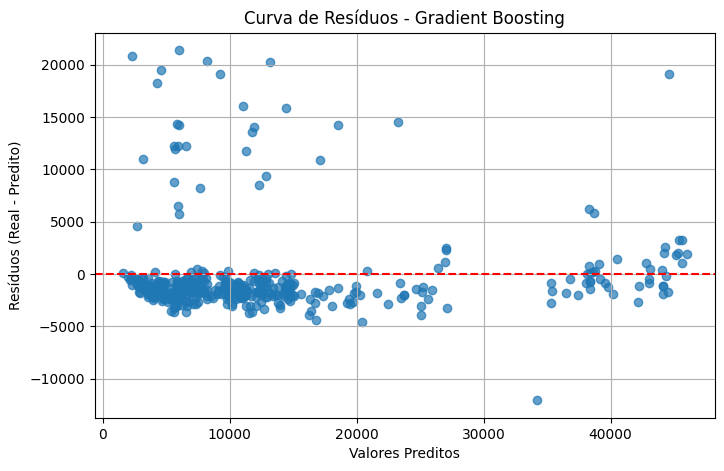

In [ ]:
# Curva de Resíduos
plt.figure(figsize=(8,5))
plt.scatter(y_pred_gb, residuos, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Curva de Resíduos - Gradient Boosting')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos (Real - Predito)')
plt.grid(True)
plt.show()

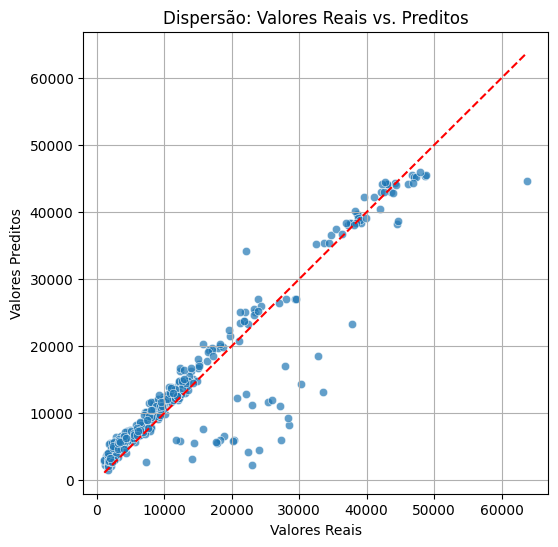

In [ ]:
# Gráfico de Dispersão das Previsões

y_test_flat = y_test

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test_flat, y=y_pred_gb, alpha=0.7)
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], 'r--')
plt.title('Dispersão: Valores Reais vs. Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.grid(True)
plt.show()

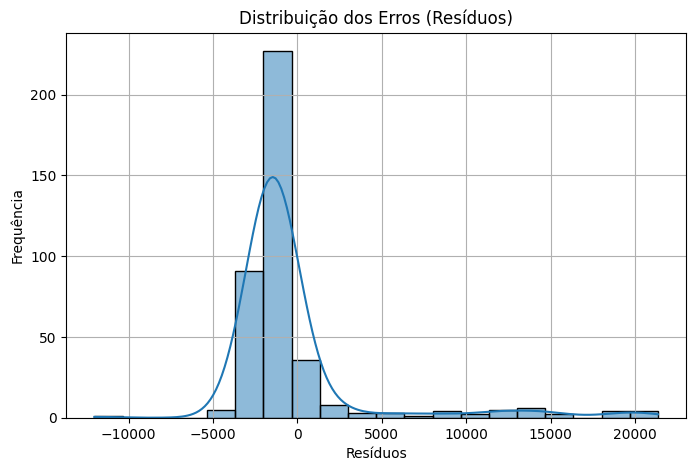

In [ ]:
# Análise de Erro (Histograma dos Resíduos)
plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True, bins=20)
plt.title('Distribuição dos Erros (Resíduos)')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [ ]:
# Estatísticas dos erros
print('Análise Numérica dos Resíduos:')
print(f'Média dos resíduos: {np.mean(residuos):.4f}')
print(f'Desvio padrão dos resíduos: {np.std(residuos):.4f}')
print(f'Máximo erro positivo: {np.max(residuos):.4f}')
print(f'Máximo erro negativo: {np.min(residuos):.4f}')

Análise Numérica dos Resíduos:
Média dos resíduos: -248.5243
Desvio padrão dos resíduos: 4346.8018
Máximo erro positivo: 21365.0268
Máximo erro negativo: -12041.0545


# **Realizando testes de previsões**

O bloco abaixo foi criado para simular a previsão dos dados referentes à 2 clientes

In [140]:
#19	female	27.900	0	yes	southwest	16884.92400
#18	male	33.770	1	no	southeast	1725.55230
dados_teste = [{
    'age':	19,
    'sex':	'female',
    'bmi':	27.900,
    'children':	0,
    'smoker':	'yes',
    'region':'northwest'}
         ,
         {
    'age':	18,
    'sex':	'male',
    'bmi':	33.770,
    'children':	1,
    'smoker':	'no',
    'region':'southeast'}
         ]
dados_teste_df = pd.DataFrame(dados_teste)
dados_teste_df

,age,sex,bmi,children,smoker,region
0,19,female,27.90,0,yes,northwest
1,18,male,33.77,1,no,southeast


In [ ]:
# transformar
dados_test_transformed = preprocessor.transform(dados_teste_df)
dados_test_transformed

<ipython-input-35-c12d9e6f6c09>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_sexo)
<ipython-input-35-c12d9e6f6c09>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_fumante)
<ipython-input-35-c12d9e6f6c09>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

array([[-1.43078885, -0.91501097, -0.28089375,  0.        ,  1.        ,
         1.        ],
       [-1.50162823, -0.08991437,  0.43289254,  1.        ,  0.        ,
         3.        ]])

In [ ]:
# realizar a previsão
previsao = modelo_gb.predict(dados_test_transformed)
previsao

array([18295.77649595,  3959.64492531])

# **Criação do Pipeline**

Aqui foi criado e treinado um Pipeline para o projeto

In [ ]:
GradientBoosting_learning_rate= 0.1
GradientBoosting_max_depth=2
GradientBoosting_n_estimators=79
numero_randomico = 42
modelo = GradientBoostingRegressor(
    learning_rate=GradientBoosting_learning_rate,
    max_depth=GradientBoosting_max_depth,
    n_estimators=GradientBoosting_n_estimators,
    random_state=numero_randomico
)


pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('modelo', modelo)
])

# Treinamento do pipeline, agora o escalonamento ocorre junto
pipeline.fit(X_train, y_train)


<ipython-input-257-c12d9e6f6c09>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_sexo)
<ipython-input-257-c12d9e6f6c09>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_fumante)
<ipython-input-257-c12d9e6f6c09>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

Pipeline(steps=[('preprocessamento',
                 ColumnTransformer(transformers=[('std', StandardScaler(),
                                                  ['age', 'children']),
                                                 ('robust', RobustScaler(),
                                                  ['bmi']),
                                                 ('transformer_sexo',
                                                  FunctionTransformer(func=<function encode_sexo at 0x7b3598e21800>),
                                                  ['sex']),
                                                 ('transformer_fumante',
                                                  FunctionTransformer(func=<function encode_fumante at 0x7b3598e20400>),
                                                  ['smoker']),
                                                 ('transformer_regiao',
                                                  FunctionTransformer(func=<function encode_regiao at 0x7b3598e20f40>),
                                                  ['region'])])),
                ('modelo',
                 GradientBoostingRegressor(max_depth=2, n_estimators=79,
                                           random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.4f}')

R²: 0.8707


<ipython-input-257-c12d9e6f6c09>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_sexo)
<ipython-input-257-c12d9e6f6c09>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_fumante)
<ipython-input-257-c12d9e6f6c09>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [ ]:
joblib.dump(pipeline, 'pipeline_treinado.joblib')

['pipeline_treinado.joblib']

# **Realizar previsão com Pipeline**

Abaixo o Pipeline foi carregado e 2 previsões foram ralizadas, simulando um ambiente de previsão

In [ ]:
pipeline_carregado = joblib.load('pipeline_treinado.joblib')

In [ ]:
#19	female	27.900	0	yes	southwest	16884.92400
#18	male	33.770	1	no	southeast	1725.55230
dados_teste = [{
    'age':	19,
    'sex':	'female',
    'bmi':	27.900,
    'children':	0,
    'smoker':	'yes',
    'region':'northwest'}
         ,
         {
    'age':	18,
    'sex':	'male',
    'bmi':	33.770,
    'children':	1,
    'smoker':	'no',
    'region':'southeast'}
         ]
dados_teste_df = pd.DataFrame(dados_teste)
dados_teste_df

,age,sex,bmi,children,smoker,region
0,19,female,27.90,0,yes,northwest
1,18,male,33.77,1,no,southeast


In [ ]:
previsao_final = pipeline_carregado.predict(dados_teste_df)

<ipython-input-257-c12d9e6f6c09>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_sexo)
<ipython-input-257-c12d9e6f6c09>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded = X.replace(dic_fumante)
<ipython-input-257-c12d9e6f6c09>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [ ]:
previsao_final

array([18295.77649595,  3959.64492531])

# **Analise Final**

O projeto consistiu no desenvolvimento de um modelo de regressão para prever os custos de seguro de saúde, utilizando a base de dados disponibilizada no Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance), que contém 1.338 registros e 7 variáveis.


Após a análise exploratória, foi possível observar que a variável com maior correlação com o custo do seguro (target) é "smoker" (0,79), seguida de "age" (0,30) e "bmi" (0,20). As demais variáveis apresentaram correlação fraca com o valor do seguro.


Foram testados diferentes algoritmos, e o modelo de Gradient Boosting apresentou o melhor desempenho, com MSE de 18.956.450 e R² de 0,8707, indicando uma boa capacidade de explicação da variabilidade dos dados.


O modelo apresenta desempenho satisfatório para o contexto acadêmico, mas, para implantação em ambiente de produção, seria necessário realizar melhorias, como:

* Obtenção de uma base de dados maior e mais diversificada, que represente melhor diferentes perfis de clientes.

* Testar o modelo retirando variáveis com correlação muito fraca, como: age, bmi e region

* Avaliar outros algoritmos, incluindo redes neurais com TensorFlow, que não foram utilizados neste projeto.

* Portanto, embora o modelo apresente boa performance inicial, seriam necessárias essas etapas adicionais para garantir sua robustez e segurança antes de uma eventual utilização em produção.